
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

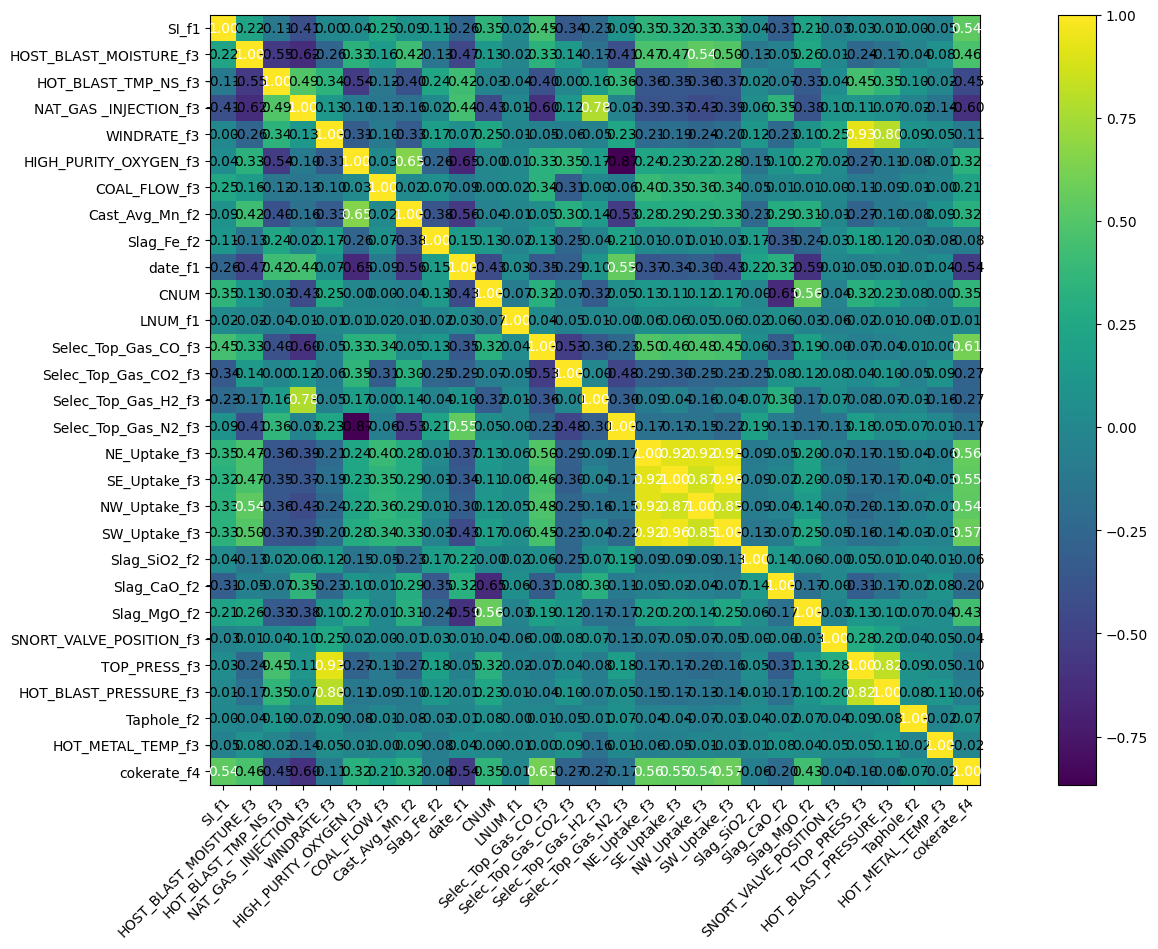

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0            0           0  0.719500  2022-01-01 00:45:00   
1            0           0  0.710486  2022-01-01 08:43:00   
2            0           0  0.666106  2022-01-01 10:17:00   
3            0           0  0.675145  2022-01-01 12:40:00   
4            0           0  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389         0           0  0.762500  2021-12-31 13:10:00   
1390         0           0  0.646000  2021-12-31 14:41:00   
1391         0           0  0.654667  2021-12-31 16:15:00   
1392         0           0  0.591667  2021-12-31 17:40:00   
1393         0           0  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0            0           0  0.719500                4.242439   
1            0           0  0.710486                4.174343   
2            0           0  0.666106                4.126144   
3            0           0  0.675145                4.120736   
4            0           0  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389         0           0  0.762500                4.204430   
1390         0           0  0.646000                4.208539   
1391         0           0  0.654667                4.212648   
1392         0           0  0.591667                4.217784   
1393         0           0  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Pass Wrangled data to GPT experimenter


In [14]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [15]:


def function_train_rc_old( train_CIVS_2 ):
    model  = Time_Series_GPT.Time_Series_GPT( tsGPT_obj )   
    model  = model.to(  tsGPT_obj.device   )
    optimizer     = torch.optim.Adam(     model.parameters(), lr = tsGPT_obj.learning_rate   )
    criterion     = nn.MSELoss()
    ## criterion     = nn.HuberLoss(reduction='mean', delta=1.0)

    sdtw_criterion = SoftDTW(use_cuda=True, gamma=0.1)

    history       = {'loss': [], 'test_loss': [], 'loss_A': [], 'loss_B': [], 'loss_C': [],
                     'loss_SIM0':[], 'loss_SIM1':[], 'loss_SIM2':[], 'loss_SIM3':[], 
                     'loss_SIM4':[], 'loss_SIM5':[]}
    train_CIVS_tr, x_means, x_standard_devs    = tsGPT_obj.standardize_x_scales( train_CIVS_2 )
    train_CIVS_tr_scaled                       = ( train_CIVS_tr - x_means ) / x_standard_devs
    model.train()
    for batch_i, epoch in enumerate( range(tsGPT_obj.max_iters) ):
        xb, yb    = tsGPT_obj.get_batch( train_CIVS_tr_scaled )
        logits   = model( xb, yb )
        B, T, E  = logits.shape
        ###########################################
        
        pred           = logits.view( B, T, E )
        y_train        = yb.view(     B, T, E )
      
        ###########################################
        
        loss_change_pred = pred[   :,   :-1,  :] - pred[   :,   1:,  :]
        loss_change_real = y_train[:,   :-1,  :] - y_train[:,   1:,  :]   

        ###########################################
        
        ## loss_change_pred = loss_change_pred[ :, : 10 ]
        ## loss_change_real = loss_change_real[ :, : 10 ]
        ## T = loss_change_pred.shape[1] + 1   ## remove rc

        ###########################################
        
        loss_A = 0 ### 0.7*criterion(loss_change_pred[:,   :5,  :].reshape(B*5, E ), loss_change_real[:,   :5,  :].reshape(B*5, E ) ) 
        loss_B = 0 ### 0.2*criterion(loss_change_pred[:,  5:10, :].reshape(B*5, E ), loss_change_real[:,  5:10, :].reshape(B*5, E ) ) 
        loss_C = 0 ### 0.1*criterion( loss_change_pred[:,10:,   :].reshape(B*4, E ), loss_change_real[:, 10:,   :].reshape(B*4, E ) )

        ############################################
        
        loss_SI    = criterion( loss_change_pred.reshape(B*(T-1), E )[:, 2], loss_change_real.reshape(B*(T-1), E )[:, 2] )
        loss_all   = criterion( loss_change_pred.reshape(B*(T-1), E ),       loss_change_real.reshape(B*(T-1), E )       )

        Curve_SIMs = tsGPT_obj.func_get_Curve_SIMs( loss_change_pred.reshape(B, (T-1), E ), loss_change_real.reshape(B, (T-1), E )  )

        #######################################################
  
        ##loss_DTW = sdtw_criterion(loss_change_pred.reshape(B,(T-1), E )[:,:, 2:3], loss_change_real.reshape(B, (T-1),E )[:, :, 2:3] )  
        ## loss_DTW = ( loss_DTW )**2
        ##loss_DTW = loss_DTW.mean()  

        #######################################################

        ## Curve_SIMs[1] 

        ##loss_total = loss_DTW        ## * 0.001 + Curve_SIMs[3]     ## loss_SI
        
        loss_total = loss_SI
        
        ## loss_total = loss_SI + loss_all +  Curve_SIMs[3]
        
        #######################################################
        
        optimizer.zero_grad( set_to_none=True )    
        loss = loss_total          
        loss.backward()
        optimizer.step()
        
        #######################################################
        
        history['loss'].append(      loss.item()  )
        history['loss_A'].append( loss_SI.item()  )
        history['loss_B'].append( loss_all.item()  )
        history['loss_C'].append( 0 ) # loss_C.item()  )
        history['loss_SIM0'].append( Curve_SIMs[0] )
        history['loss_SIM1'].append( Curve_SIMs[1] )
        #history['loss_SIM2'].append( Curve_SIMs[2] )
        #history['loss_SIM3'].append( Curve_SIMs[3] )
        #history['loss_SIM4'].append( Curve_SIMs[4] )
        #history['loss_SIM5'].append( Curve_SIMs[5] )
        if batch_i % 500 == 0:
            print(batch_i, "train loss = ", loss.item()    )
            print("seq length of pred = ",  pred.shape[1]  )
            print(Curve_SIMs)
            print("loss_SI...", [ loss_SI  ] )
            print("loss_all..", [ loss_all ] )
            ##print("loss_DTW..", loss_DTW     )
            print("loss_total..", loss_total )
            print("*************************")
    tsGPT_obj.plot_losses_training( history )
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled        



In [16]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    # === Model Setup ===
    model = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()


    # === History ===
    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    # === Data Scaling ===
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled = (train_CIVS_tr - x_means) / x_standard_devs

    model.train()
    

    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        xb, yb = tsGPT_obj.get_batch(train_CIVS_tr_scaled)  # shapes: [B, T, F]
        
        ## B, T, E  = logits.shape
        
        # === Forward Pass with Reasoning Mode ===
        pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  # pred: [B, F] (only the last timestep)
        
        
        
        #####################################################################################
        
 
        # === Match dimensions for loss ===
        B, T, E = xb.shape
        y_train = yb[:, -1, :]  # last timestep only
        pred = pred.view(B, E)
        
        y_si = y_train[:, 2]     # [B]
        
   
        loss_SI  = criterion(pred_si, y_si)
        ## loss_SI  = criterion(pred[:, 2], y_train[:, 2])       # special loss on feature 2
        
        loss_all = criterion(pred, y_train)

        alpha = 0.9
        
        loss_total = alpha * loss_SI + (1 - alpha) * loss_all

        ####################################################################################

        # === Backprop ===
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 500 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [17]:

'''

batch_size, len_x, len_y, dims = 8, 15, 12, 5
x = torch.rand((batch_size, len_x, dims), requires_grad=True)
y = torch.rand((batch_size, len_y, dims))
x.shape
x[1, 1, :5]

## x[1, 1, 2:3]

'''


'\n\nbatch_size, len_x, len_y, dims = 8, 15, 12, 5\nx = torch.rand((batch_size, len_x, dims), requires_grad=True)\ny = torch.rand((batch_size, len_y, dims))\nx.shape\nx[1, 1, :5]\n\n## x[1, 1, 2:3]\n\n'

In [18]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.647226
Loss_SI: 0.6458474397659302 Loss_all: 0.6596297025680542
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.115813
Loss_SI: 0.052437640726566315 Loss_all: 0.6861936450004578
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.076785
Loss_SI: 0.017621928825974464 Loss_all: 0.6092487573623657
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.065556
Loss_SI: 0.02238975651562214 Loss_all: 0.4540518522262573
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.033324
Loss_SI: 0.012271559797227383 Loss_all: 0.2227955460548401
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.025158
Loss_SI: 0.010500245727598667 Loss_all: 0.15708217024803162
Prediction shape: torch.Size([32, 35])
===


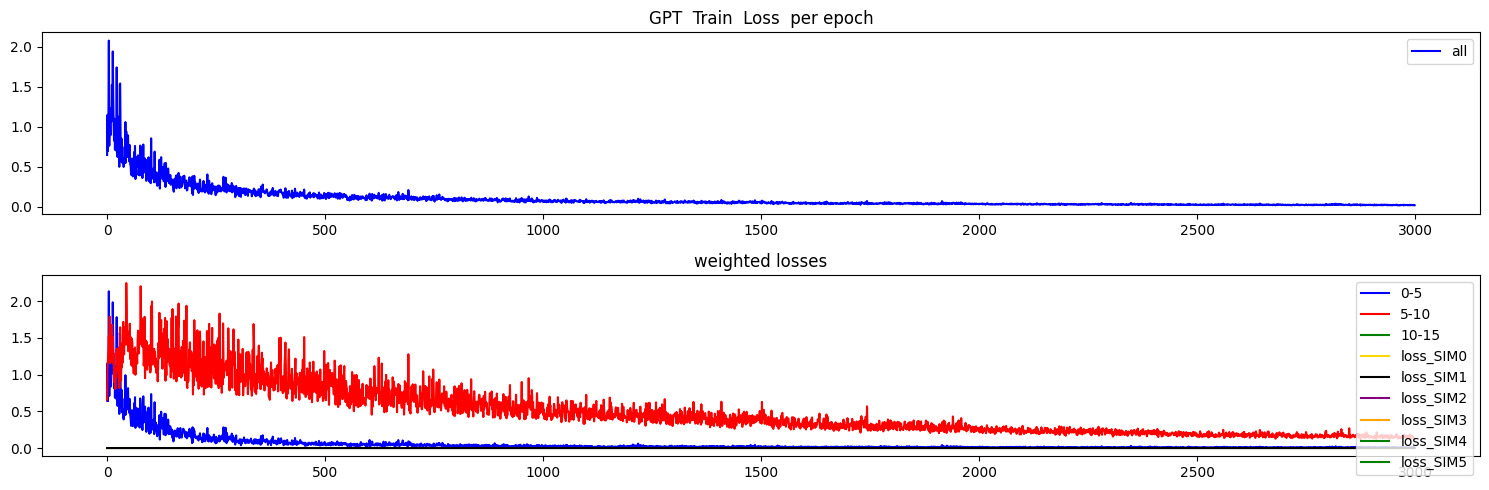

(19,)
(19,)
mae, mse, rmse, mape, mspe, rse, corr
(0.19619946, 0.04710079, 0.21702716, 0.21332473, 0.05991935, 1.6099082)
Testing R**2 - SI only:  -1.5918048170434775
Testing R**2 - All features (yes inputs):  0.9929372096570572
Testing R**2 - (all) - (no inputs):  0.98896295125196
Testing R**2 - (f2) - SI full (yes inputs):  -1.5918048170434775
Testing R**2 - (f2) - SI full (no inputs):  -7.133100709284944
Test MSE Loss - SI only:  0.04710078984498978
Testing R**2 - SI only:  -1.5918048170434775


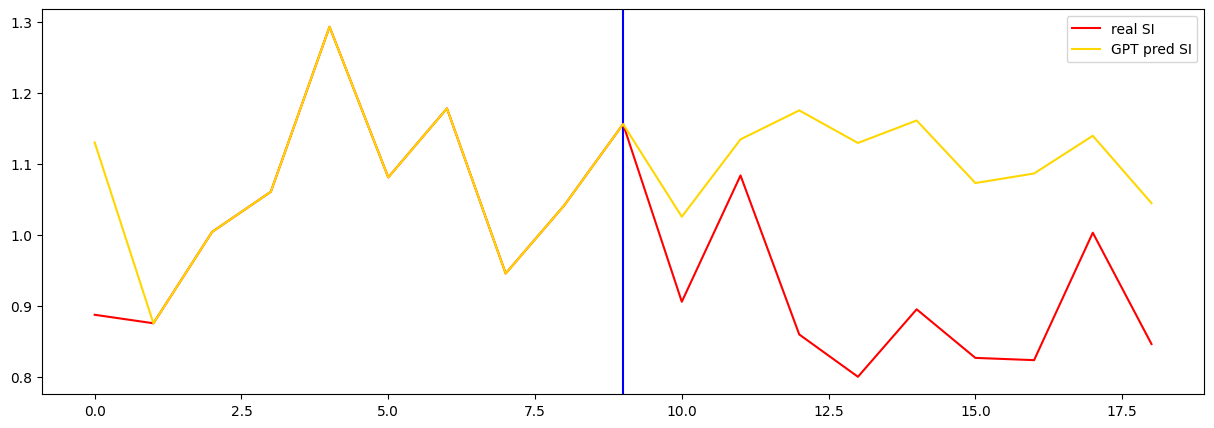

In [19]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


[0] Train Loss: 1.272464
Loss_SI: 1.2816944122314453 Loss_all: 1.189391851425171
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.232221
Loss_SI: 0.16389048099517822 Loss_all: 0.8471925258636475
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.124576
Loss_SI: 0.05272790789604187 Loss_all: 0.7712069153785706
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.074398
Loss_SI: 0.02694052644073963 Loss_all: 0.50151127576828
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.070219
Loss_SI: 0.023184943944215775 Loss_all: 0.49352920055389404
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.078885
Loss_SI: 0.035545527935028076 Loss_all: 0.4689400792121887
Prediction shape: torch.Size([32, 35])
===


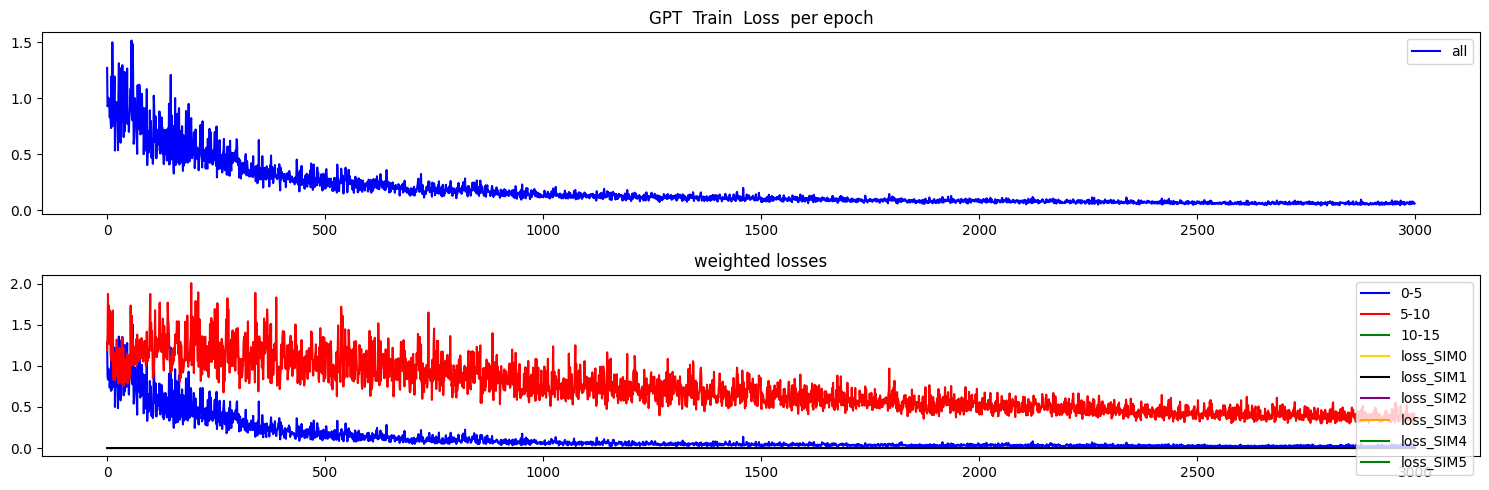

(19,)
(19,)
mae, mse, rmse, mape, mspe, rse, corr
(0.17820854, 0.038127612, 0.19526292, 0.19239734, 0.047124896, 1.4484612)
Testing R**2 - SI only:  -1.0980397383868747
Testing R**2 - All features (yes inputs):  0.9946197730496795
Testing R**2 - (all) - (no inputs):  0.992607154064258
Testing R**2 - (f2) - SI full (yes inputs):  -1.0980397383868747
Testing R**2 - (f2) - SI full (no inputs):  -4.6752444163079545
Test MSE Loss - SI only:  0.03812761232256889
Testing R**2 - SI only:  -1.0980397383868747


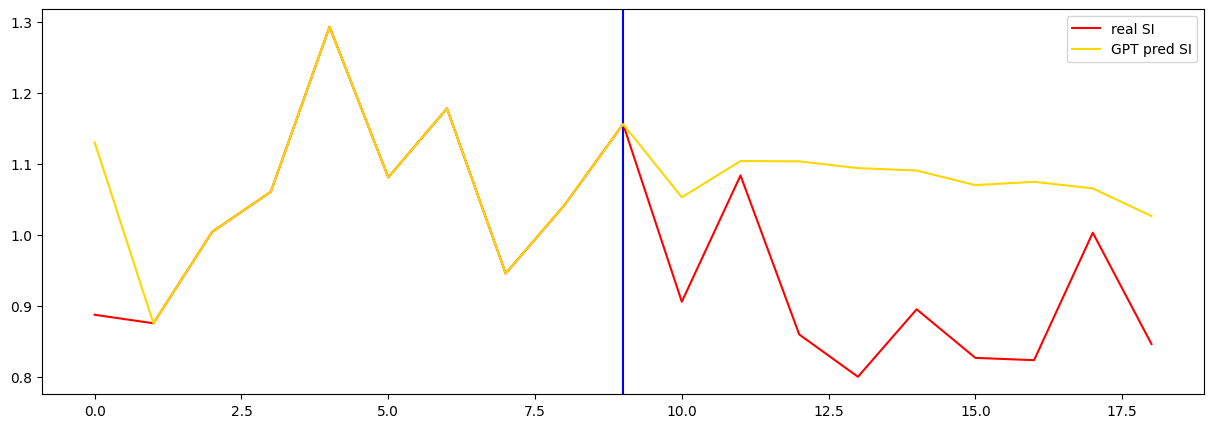

In [20]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


[0] Train Loss: 0.957641
Loss_SI: 0.9668573141098022 Loss_all: 0.8746967315673828
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.435170
Loss_SI: 0.3654993176460266 Loss_all: 1.0622045993804932
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.268141
Loss_SI: 0.17245683073997498 Loss_all: 1.1293011903762817
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.161583
Loss_SI: 0.09159278869628906 Loss_all: 0.7914921045303345
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.115414
Loss_SI: 0.03556070849299431 Loss_all: 0.8340952396392822
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.130245
Loss_SI: 0.042913854122161865 Loss_all: 0.9162207245826721
Prediction shape: torch.Size([32, 35])
===


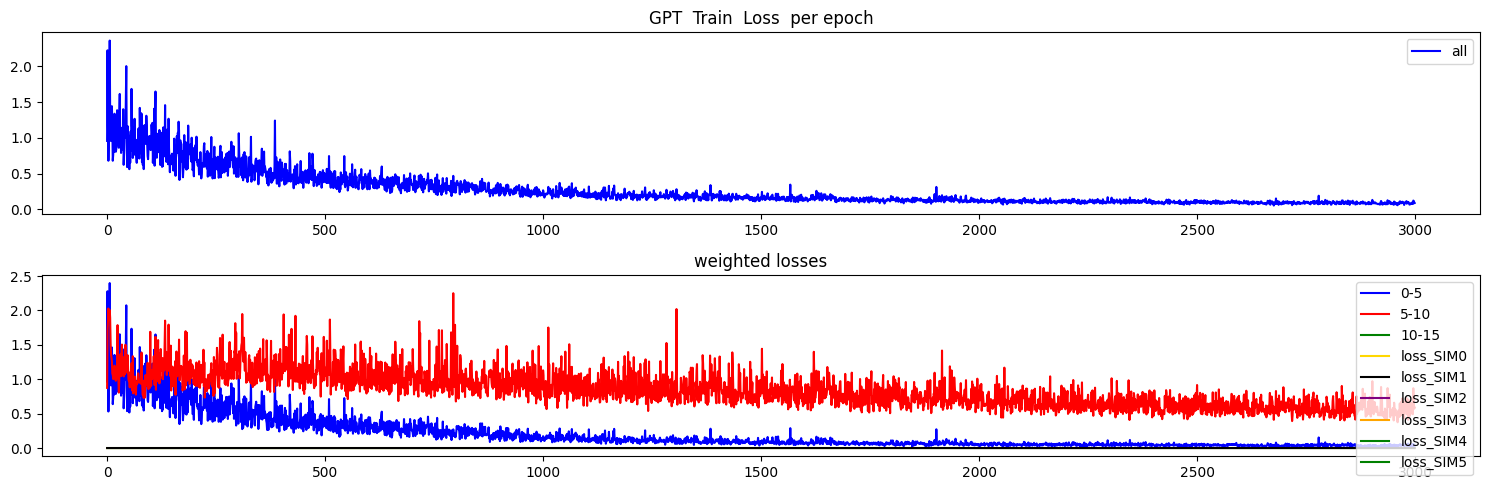

(19,)
(19,)
mae, mse, rmse, mape, mspe, rse, corr
(0.14467333, 0.02510888, 0.15845782, 0.15037704, 0.027521761, 1.1754407)
Testing R**2 - SI only:  -0.3816607991060057
Testing R**2 - All features (yes inputs):  0.9929462598742814
Testing R**2 - (all) - (no inputs):  0.9889825527880943
Testing R**2 - (f2) - SI full (yes inputs):  -0.3816607991060057
Testing R**2 - (f2) - SI full (no inputs):  -1.1092642363037437
Test MSE Loss - SI only:  0.025108877569437027
Testing R**2 - SI only:  -0.3816607991060057


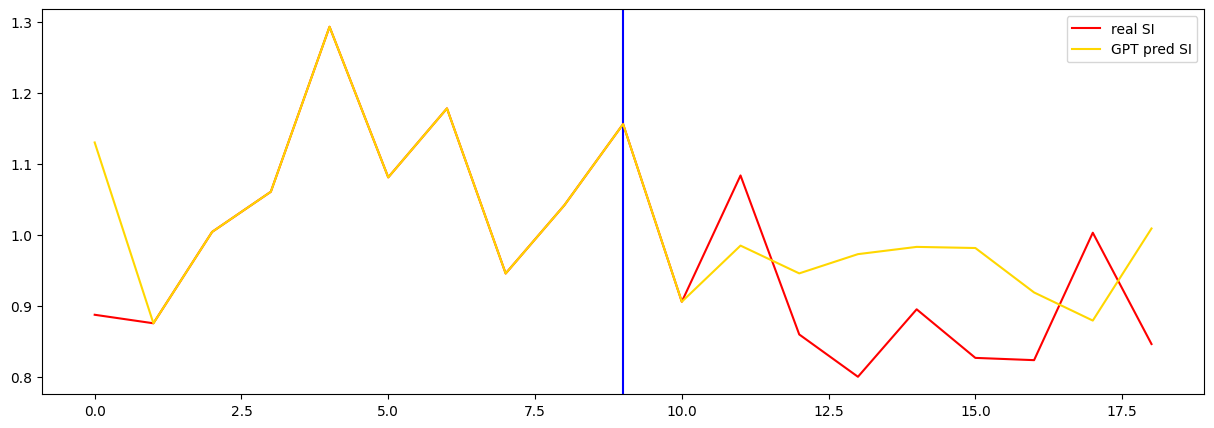

In [21]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


[0] Train Loss: 0.596130
Loss_SI: 0.5517374277114868 Loss_all: 0.9956599473953247
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.519863
Loss_SI: 0.4298005700111389 Loss_all: 1.3304266929626465
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.247873
Loss_SI: 0.16624222695827484 Loss_all: 0.9825548529624939
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.311005
Loss_SI: 0.2605515122413635 Loss_all: 0.7650891542434692
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.291547
Loss_SI: 0.14339788258075714 Loss_all: 1.6248886585235596
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.136421
Loss_SI: 0.08845847100019455 Loss_all: 0.5680838227272034
Prediction shape: torch.Size([32, 35])
===


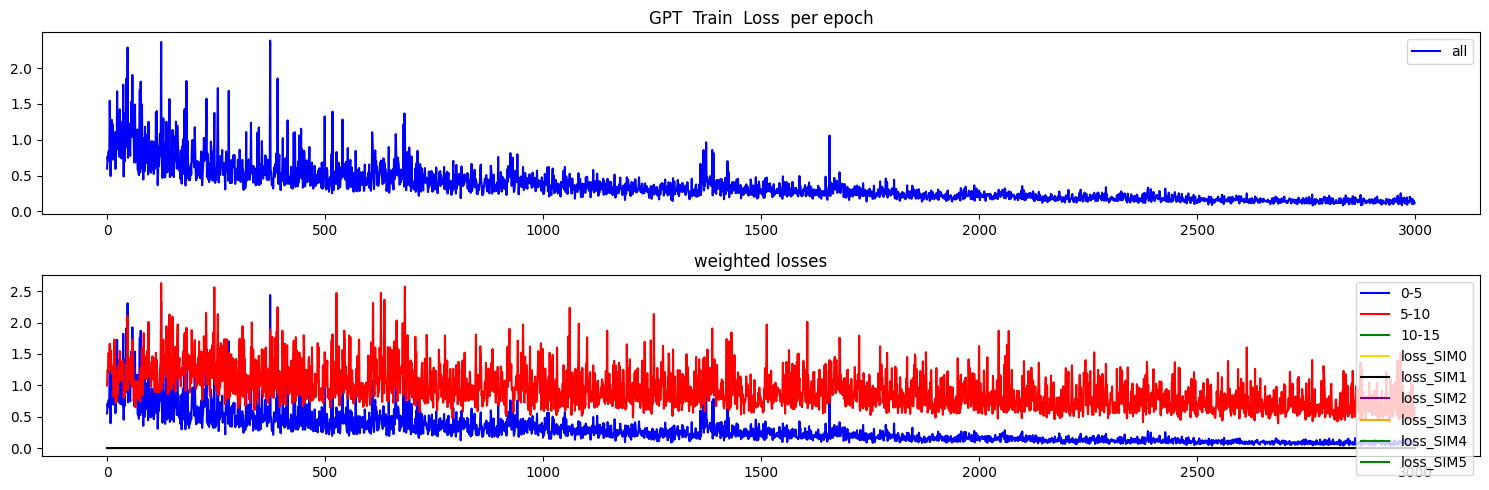

(19,)
(19,)
mae, mse, rmse, mape, mspe, rse, corr
(0.12335891, 0.021141013, 0.1453995, 0.124876596, 0.021815732, 1.0785741)
Testing R**2 - SI only:  -0.16332187333116033
Testing R**2 - All features (yes inputs):  0.989947549382582
Testing R**2 - (all) - (no inputs):  0.9824877548774087
Testing R**2 - (f2) - SI full (yes inputs):  -0.16332187333116033
Testing R**2 - (f2) - SI full (no inputs):  -0.02242005490152077
Test MSE Loss - SI only:  0.021141011267900467
Testing R**2 - SI only:  -0.16332187333116033


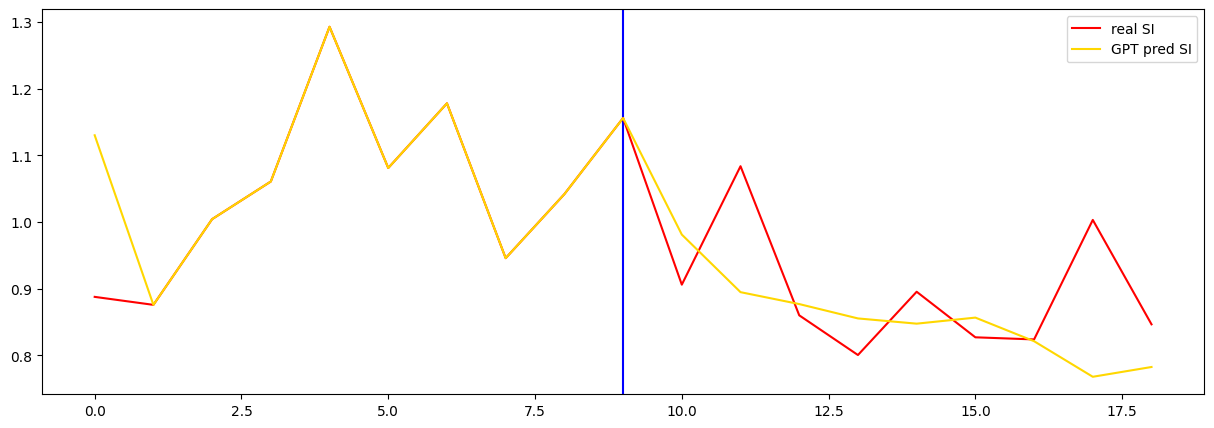

In [22]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )



## Run 2


In [23]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.635428
Loss_SI: 0.5894764065742493 Loss_all: 1.048990249633789
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.119373
Loss_SI: 0.04677778482437134 Loss_all: 0.772732675075531
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.056751
Loss_SI: 0.013068453408777714 Loss_all: 0.4498979449272156
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.047597
Loss_SI: 0.014653399586677551 Loss_all: 0.3440932035446167
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.030704
Loss_SI: 0.008641213178634644 Loss_all: 0.22927235066890717
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.024850
Loss_SI: 0.00929979607462883 Loss_all: 0.16480177640914917
Prediction shape: torch.Size([32, 35])
===


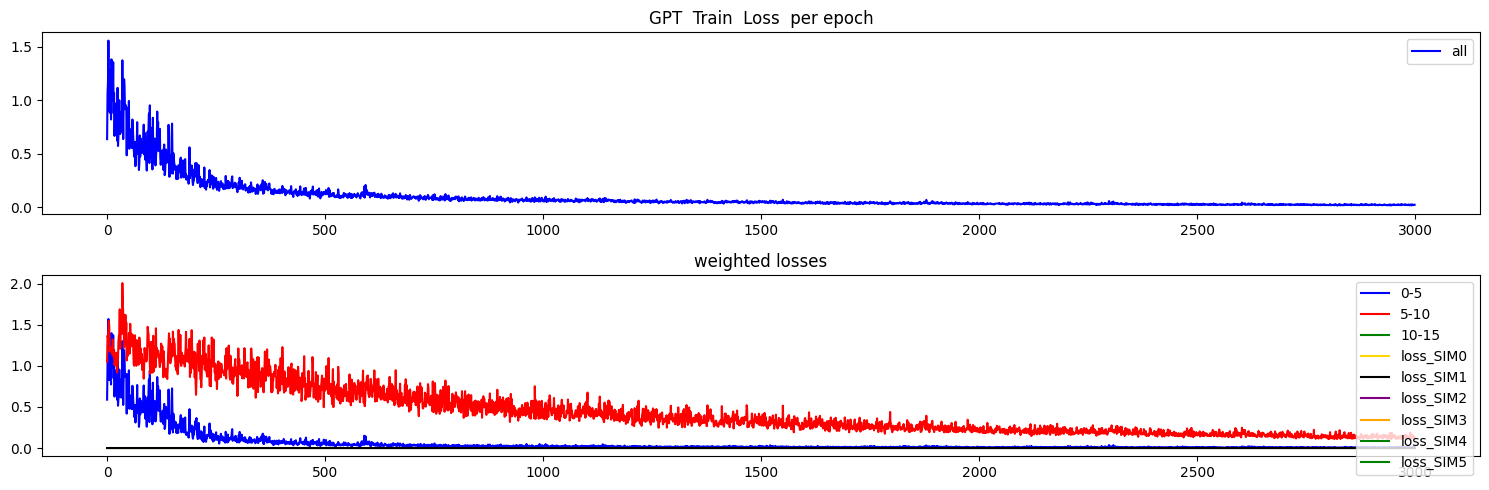

(19,)
(19,)
mae, mse, rmse, mape, mspe, rse, corr
(0.11834576, 0.024755353, 0.15733834, 0.12460861, 0.0311361, 0.7967577)
Testing R**2 - SI only:  0.3651772726657023
Testing R**2 - All features (yes inputs):  0.9865265298503727
Testing R**2 - (all) - (no inputs):  0.9864216795763497
Testing R**2 - (f2) - SI full (yes inputs):  0.3651772726657023
Testing R**2 - (f2) - SI full (no inputs):  0.16159566048123708
Test MSE Loss - SI only:  0.02475535310804844
Testing R**2 - SI only:  0.3651772726657023


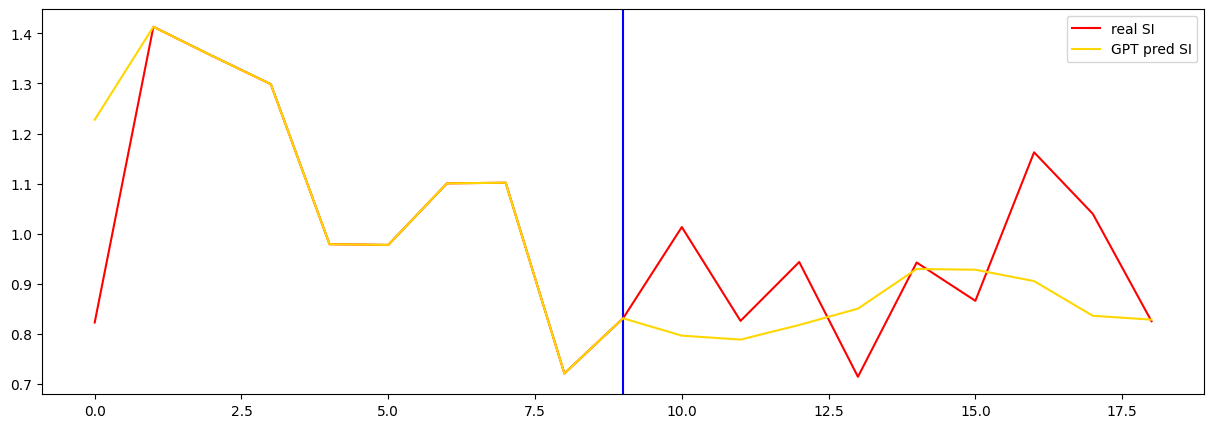

In [24]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )


[0] Train Loss: 0.633785
Loss_SI: 0.6003899574279785 Loss_all: 0.9343361854553223
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.156323
Loss_SI: 0.10335618257522583 Loss_all: 0.6330286264419556
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.107229
Loss_SI: 0.05314581096172333 Loss_all: 0.5939734578132629
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.109007
Loss_SI: 0.0718575268983841 Loss_all: 0.44335582852363586
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.079152
Loss_SI: 0.04553309828042984 Loss_all: 0.3817213773727417
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.052540
Loss_SI: 0.020637940615415573 Loss_all: 0.33965829014778137
Prediction shape: torch.Size([32, 35])
===


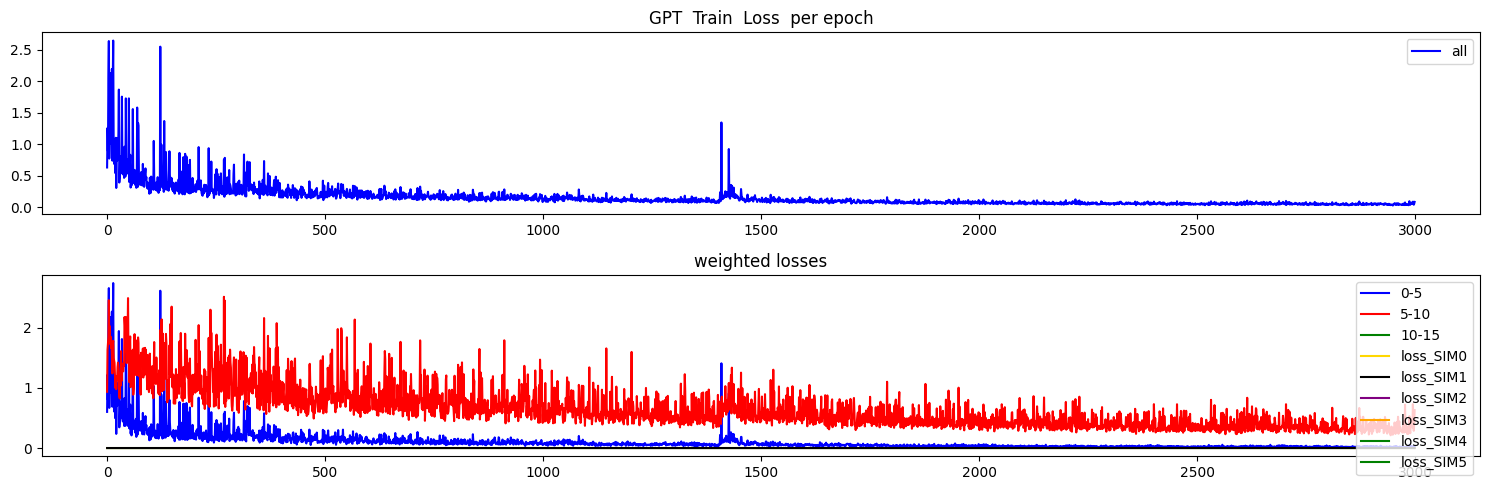

(19,)
(19,)
mae, mse, rmse, mape, mspe, rse, corr
(0.195816, 0.05830827, 0.24147105, 0.20781192, 0.067387864, 1.2228038)
Testing R**2 - SI only:  -0.4952488664793053
Testing R**2 - All features (yes inputs):  0.8918599749618747
Testing R**2 - (all) - (no inputs):  0.796167593909383
Testing R**2 - (f2) - SI full (yes inputs):  -0.4952488664793053
Testing R**2 - (f2) - SI full (no inputs):  -4.2413918153275585
Test MSE Loss - SI only:  0.05830826982855797
Testing R**2 - SI only:  -0.4952488664793053


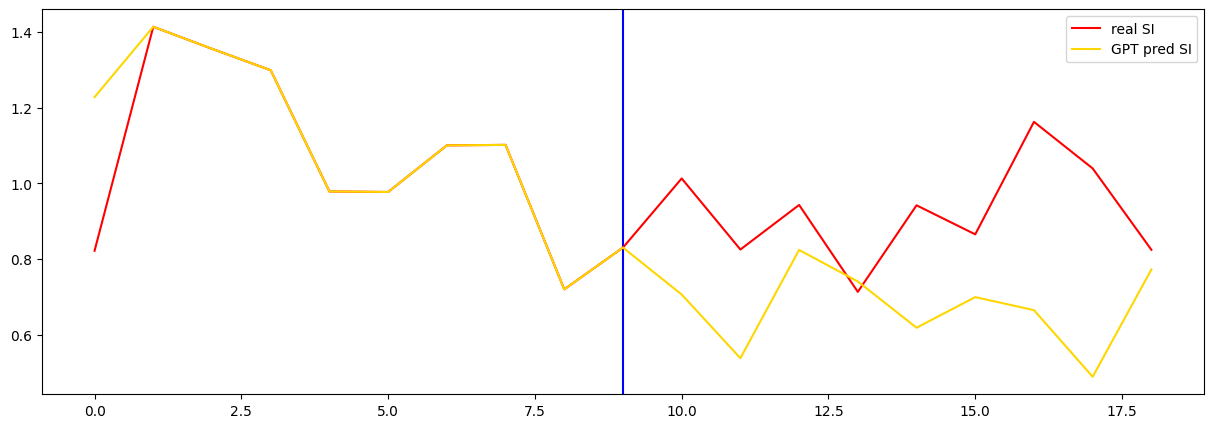

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


[0] Train Loss: 0.708438
Loss_SI: 0.6613497734069824 Loss_all: 1.1322276592254639
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.277481
Loss_SI: 0.23549506068229675 Loss_all: 0.6553558111190796
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.184642
Loss_SI: 0.11630788445472717 Loss_all: 0.799652099609375
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.141143
Loss_SI: 0.054933927953243256 Loss_all: 0.9170234799385071
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.111209
Loss_SI: 0.07538367807865143 Loss_all: 0.43363288044929504
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.085770
Loss_SI: 0.04443567246198654 Loss_all: 0.45777925848960876
Prediction shape: torch.Size([32, 35])
===


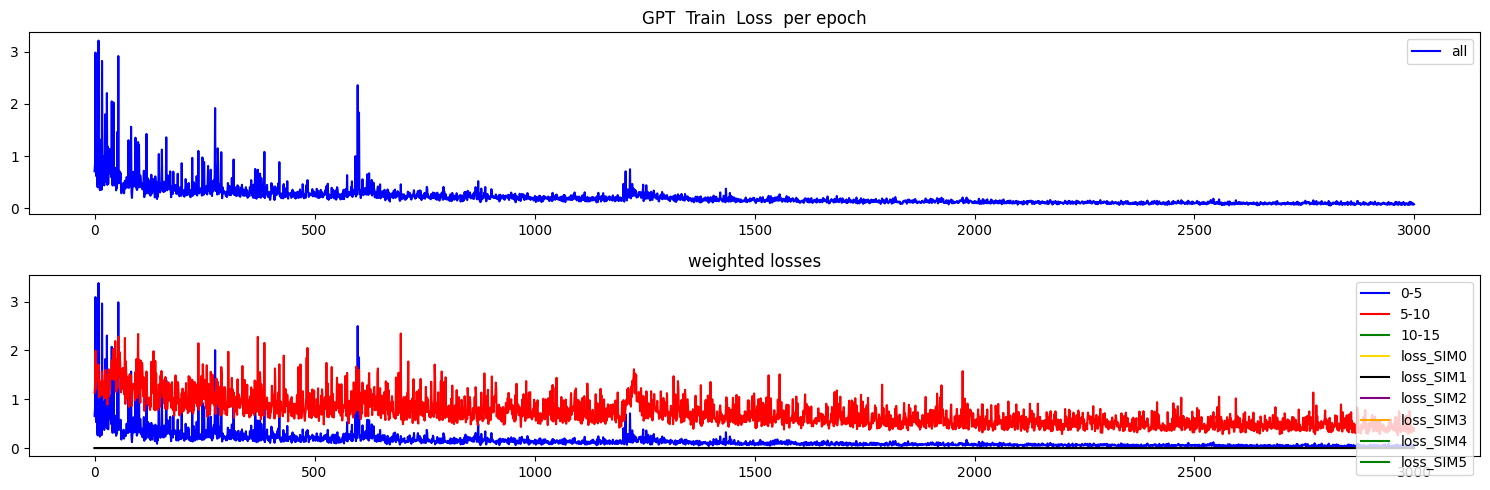

(19,)
(19,)
mae, mse, rmse, mape, mspe, rse, corr
(0.13947219, 0.029715074, 0.17238061, 0.14912379, 0.037377037, 0.87293136)
Testing R**2 - SI only:  0.23799091682216866
Testing R**2 - All features (yes inputs):  0.9801241117542007
Testing R**2 - (all) - (no inputs):  0.9735545584120725
Testing R**2 - (f2) - SI full (yes inputs):  0.23799091682216866
Testing R**2 - (f2) - SI full (no inputs):  -0.4892445527522924
Test MSE Loss - SI only:  0.029715074226260185
Testing R**2 - SI only:  0.23799091682216866


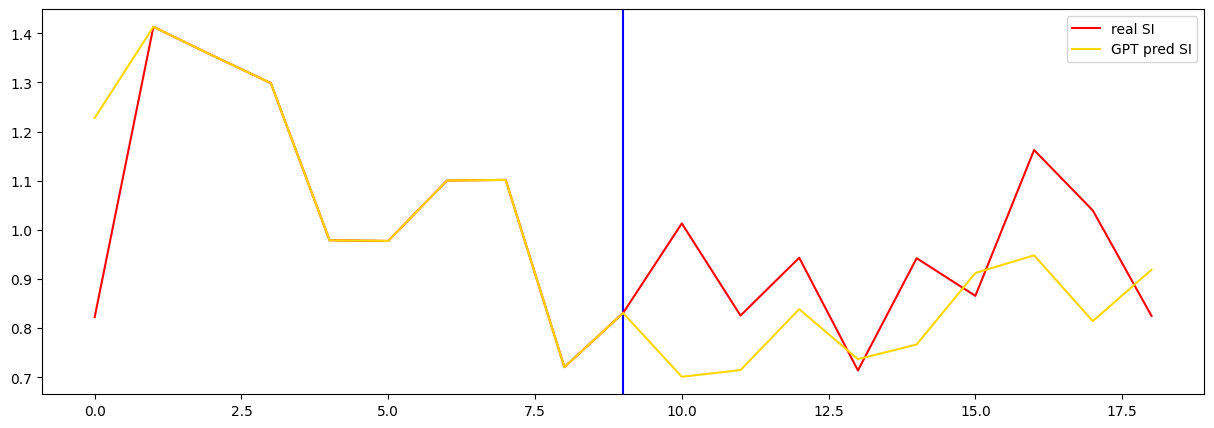

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


[0] Train Loss: 0.859417
Loss_SI: 0.8304811716079712 Loss_all: 1.1198359727859497
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.235671
Loss_SI: 0.19028356671333313 Loss_all: 0.6441590785980225
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.185686
Loss_SI: 0.15518315136432648 Loss_all: 0.4602140188217163
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.130972
Loss_SI: 0.10244670510292053 Loss_all: 0.3876972198486328
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.231875
Loss_SI: 0.17039795219898224 Loss_all: 0.7851731777191162
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.249760
Loss_SI: 0.1435275673866272 Loss_all: 1.2058507204055786
Prediction shape: torch.Size([32, 35])
===


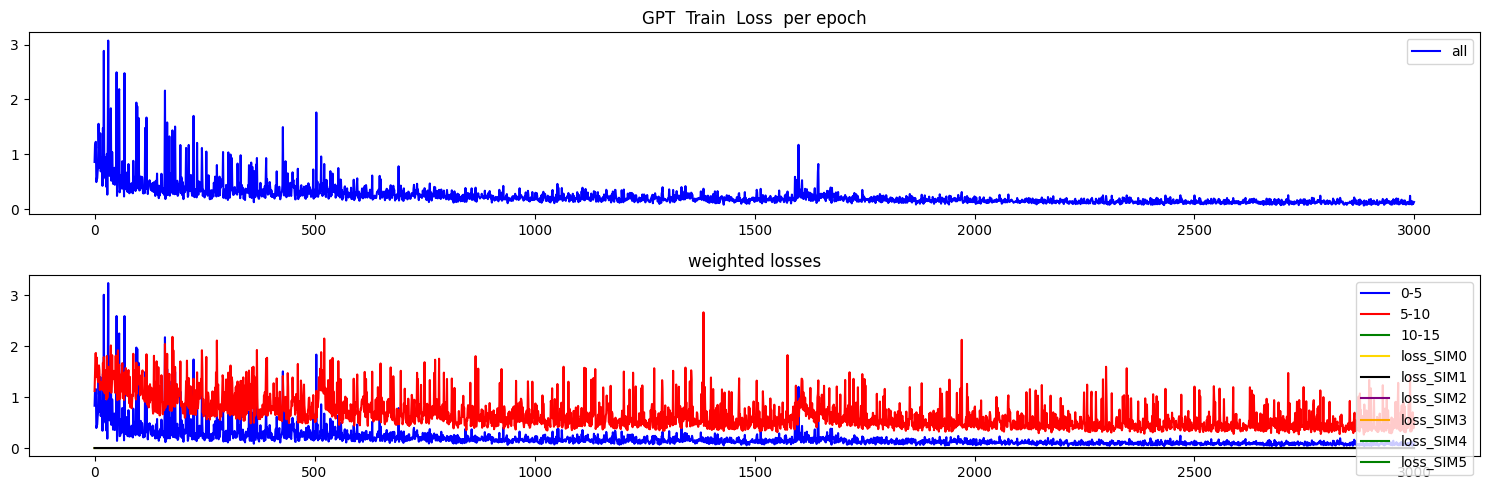

(19,)
(19,)
mae, mse, rmse, mape, mspe, rse, corr
(0.19738534, 0.06167078, 0.24833602, 0.22406574, 0.0923482, 1.2575678)
Testing R**2 - SI only:  -0.5814764079350361
Testing R**2 - All features (yes inputs):  0.9606410541595789
Testing R**2 - (all) - (no inputs):  0.9343989005079688
Testing R**2 - (f2) - SI full (yes inputs):  -0.5814764079350361
Testing R**2 - (f2) - SI full (no inputs):  -4.682636877311179
Test MSE Loss - SI only:  0.06167076900601387
Testing R**2 - SI only:  -0.5814764079350361


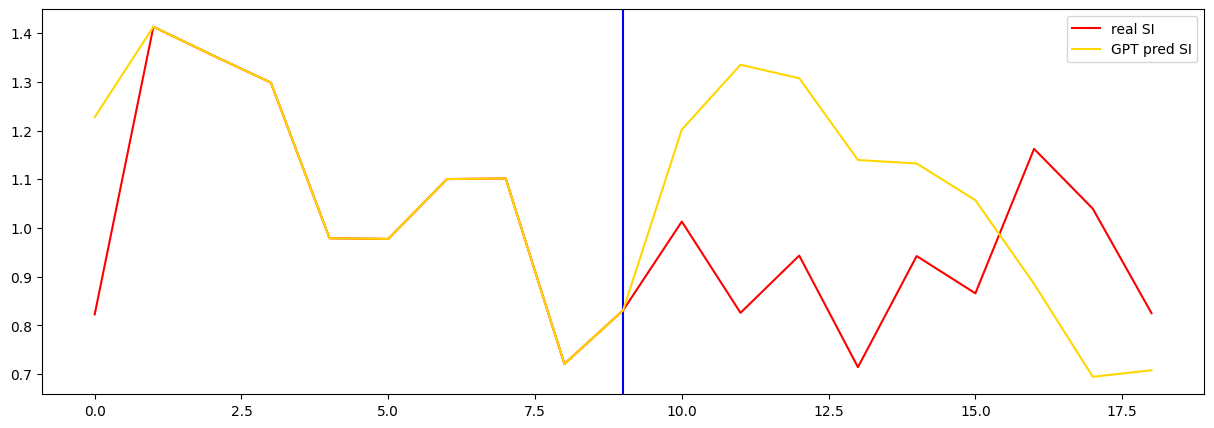

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )



## Run 3


In [28]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.616758
Loss_SI: 0.565613865852356 Loss_all: 1.0770527124404907
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.110601
Loss_SI: 0.056560929864645004 Loss_all: 0.5969655513763428
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.063389
Loss_SI: 0.015266520902514458 Loss_all: 0.496489018201828
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.040377
Loss_SI: 0.011387302540242672 Loss_all: 0.3012801706790924
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.031542
Loss_SI: 0.011136885732412338 Loss_all: 0.2151905596256256
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.028751
Loss_SI: 0.007612049579620361 Loss_all: 0.21900153160095215
Prediction shape: torch.Size([32, 35])
===


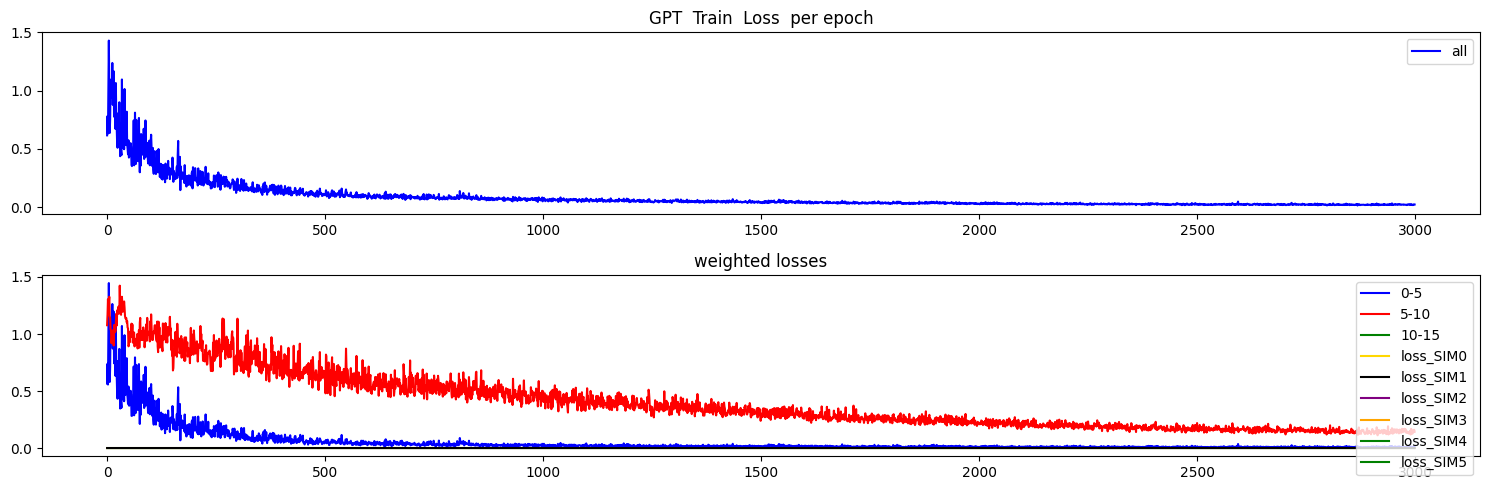

(19,)
(19,)
mae, mse, rmse, mape, mspe, rse, corr
(0.29035765, 0.1661905, 0.4076647, 0.20322032, 0.0640838, 1.1672877)
Testing R**2 - SI only:  -0.36256055930299835
Testing R**2 - All features (yes inputs):  0.9090331571913194
Testing R**2 - (all) - (no inputs):  0.7870405400784825
Testing R**2 - (f2) - SI full (yes inputs):  -0.36256055930299835
Testing R**2 - (f2) - SI full (no inputs):  -0.9445549975020635
Test MSE Loss - SI only:  0.166190505027771
Testing R**2 - SI only:  -0.36256055930299835


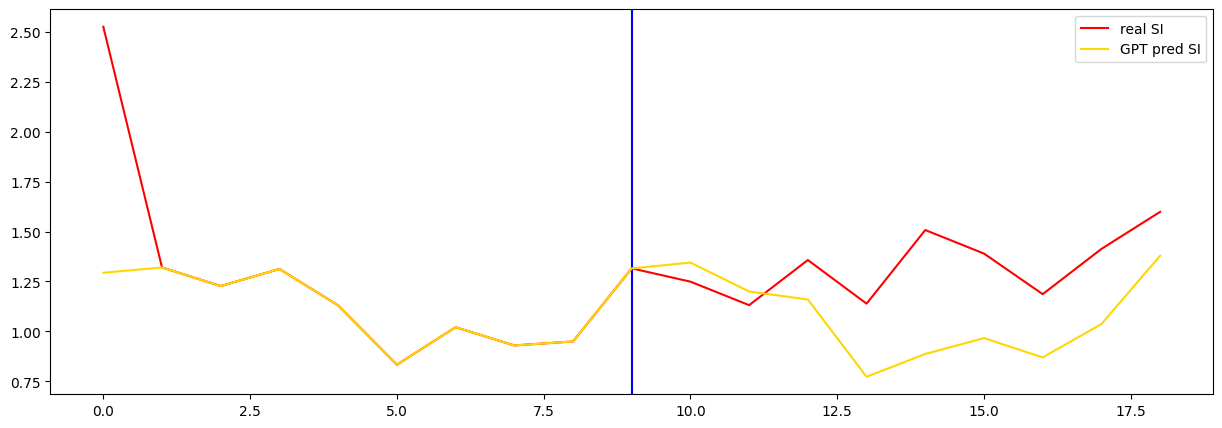

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )


[0] Train Loss: 0.752491
Loss_SI: 0.7265025973320007 Loss_all: 0.9863863587379456
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.447207
Loss_SI: 0.3917999863624573 Loss_all: 0.9458731412887573
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.193998
Loss_SI: 0.11982731521129608 Loss_all: 0.8615330457687378
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.156032
Loss_SI: 0.07896939665079117 Loss_all: 0.849597156047821
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.076544
Loss_SI: 0.039409905672073364 Loss_all: 0.4107476770877838
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.087619
Loss_SI: 0.041914016008377075 Loss_all: 0.49896055459976196
Prediction shape: torch.Size([32, 35])
===


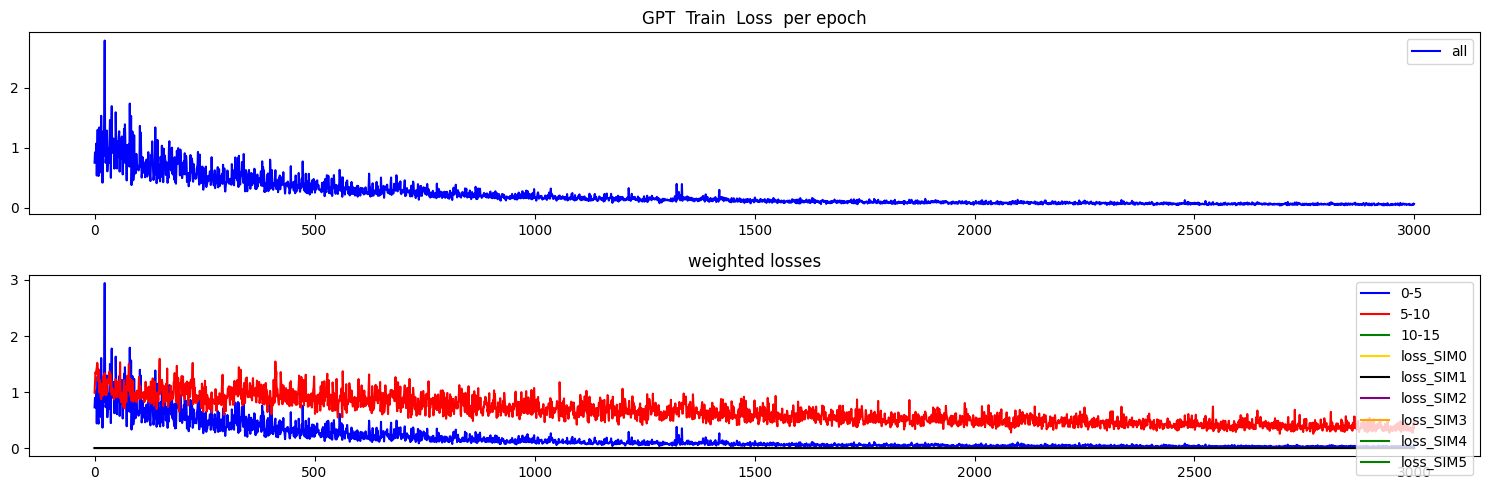

(19,)
(19,)
mae, mse, rmse, mape, mspe, rse, corr
(0.26160553, 0.16853406, 0.410529, 0.17942613, 0.051956225, 1.1754892)
Testing R**2 - SI only:  -0.381774820030893
Testing R**2 - All features (yes inputs):  0.9273300127229878
Testing R**2 - (all) - (no inputs):  0.833241914406829
Testing R**2 - (f2) - SI full (yes inputs):  -0.381774820030893
Testing R**2 - (f2) - SI full (no inputs):  -0.9750763675813037
Test MSE Loss - SI only:  0.168534055352211
Testing R**2 - SI only:  -0.381774820030893


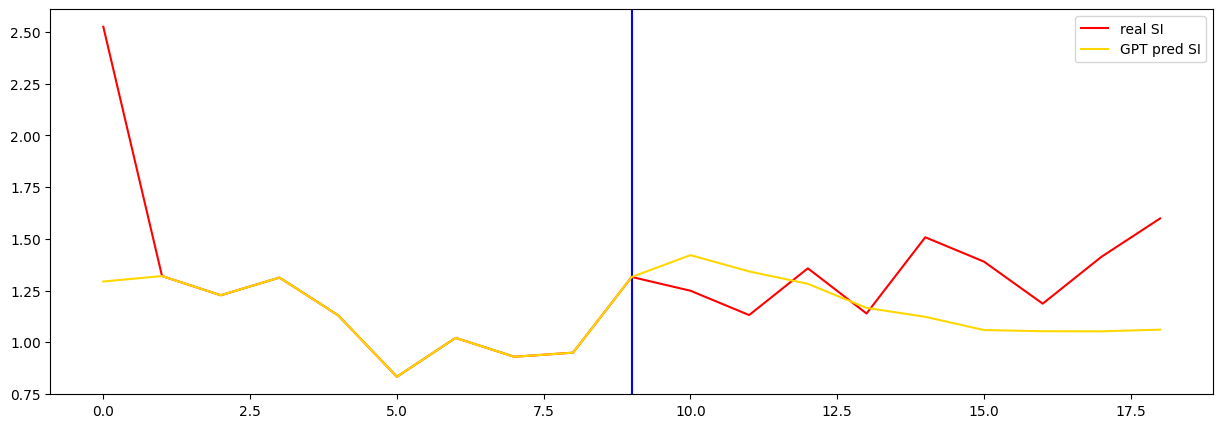

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )


[0] Train Loss: 1.613415
Loss_SI: 1.6548293828964233 Loss_all: 1.2406890392303467
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.503130
Loss_SI: 0.3718031942844391 Loss_all: 1.685071587562561
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.299075
Loss_SI: 0.25162720680236816 Loss_all: 0.726102888584137
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.187950
Loss_SI: 0.12774890661239624 Loss_all: 0.7297608852386475
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.108785
Loss_SI: 0.06894544512033463 Loss_all: 0.4673411250114441
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.122872
Loss_SI: 0.06657165288925171 Loss_all: 0.62957763671875
Prediction shape: torch.Size([32, 35])
===


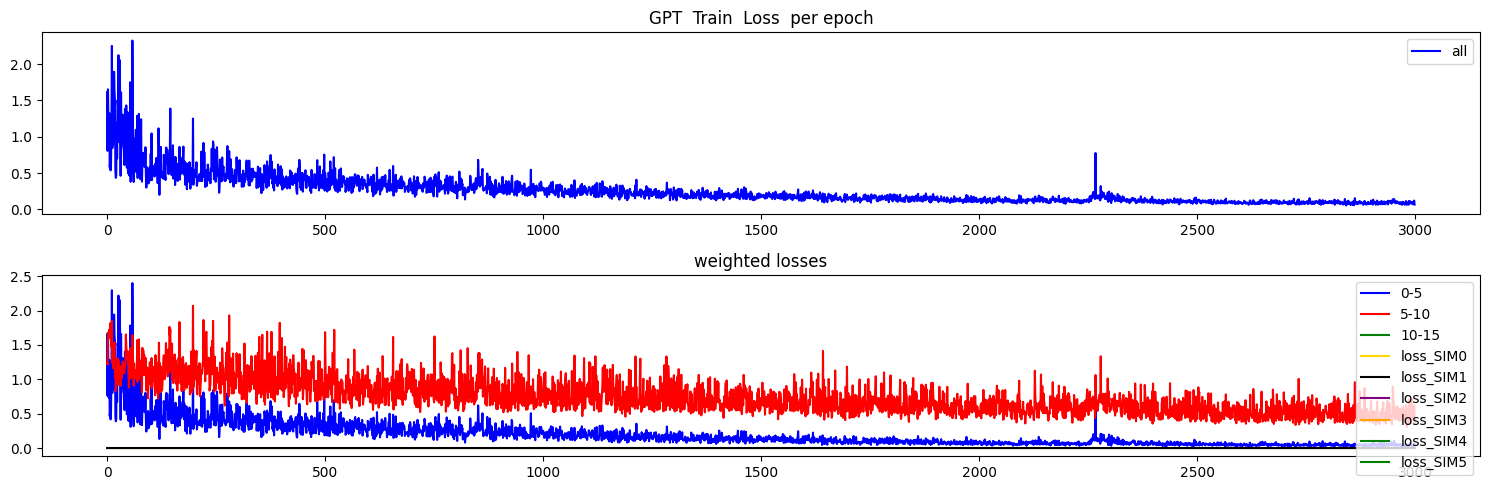

(19,)
(19,)
mae, mse, rmse, mape, mspe, rse, corr
(0.3040669, 0.2027826, 0.4503139, 0.20772105, 0.065450475, 1.2894074)
Testing R**2 - SI only:  -0.6625713431098621
Testing R**2 - All features (yes inputs):  0.929896138819025
Testing R**2 - (all) - (no inputs):  0.8397216366846373
Testing R**2 - (f2) - SI full (yes inputs):  -0.6625713431098621
Testing R**2 - (f2) - SI full (no inputs):  -1.4211145846757072
Test MSE Loss - SI only:  0.20278258621692657
Testing R**2 - SI only:  -0.6625713431098621


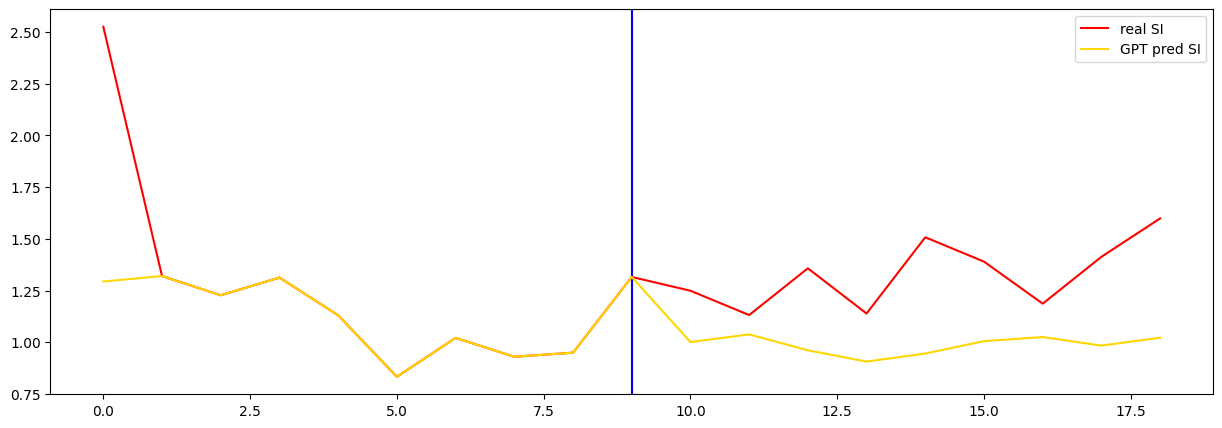

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


[0] Train Loss: 1.735960
Loss_SI: 1.7428364753723145 Loss_all: 1.6740692853927612
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.453085
Loss_SI: 0.4034822881221771 Loss_all: 0.899510383605957
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.220443
Loss_SI: 0.1754510998725891 Loss_all: 0.6253682374954224
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.259166
Loss_SI: 0.14290043711662292 Loss_all: 1.3055585622787476
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.156369
Loss_SI: 0.0874190703034401 Loss_all: 0.7769160270690918
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.128772
Loss_SI: 0.08653226494789124 Loss_all: 0.5089269280433655
Prediction shape: torch.Size([32, 35])
===


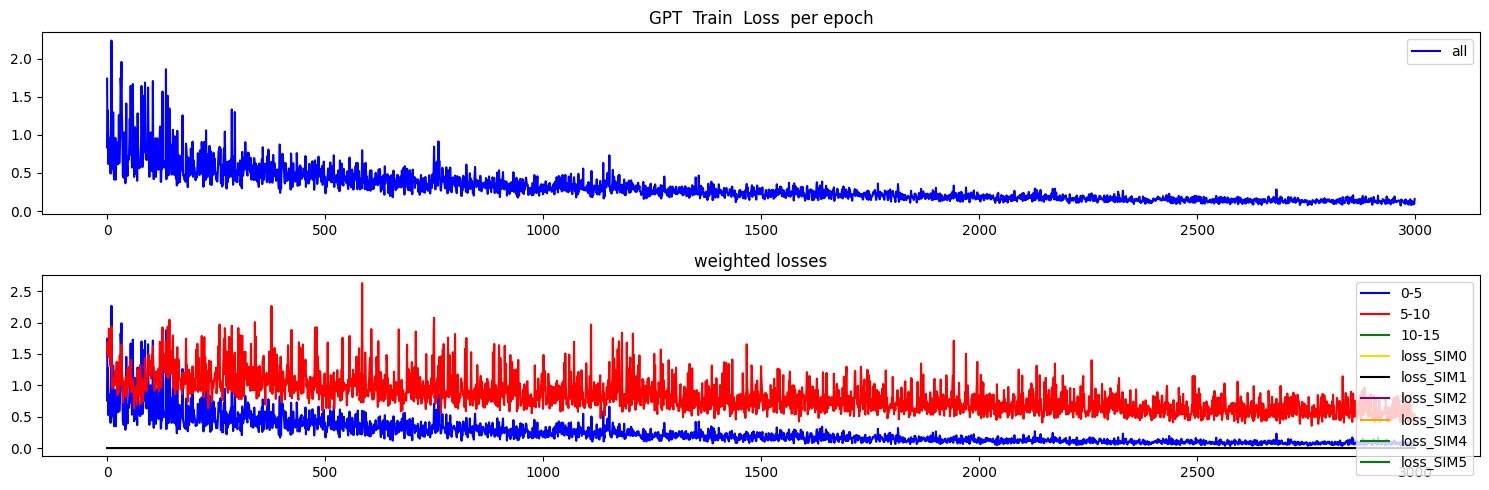

(19,)
(19,)
mae, mse, rmse, mape, mspe, rse, corr
(0.320202, 0.22443897, 0.4737499, 0.21848814, 0.07266039, 1.356513)
Testing R**2 - SI only:  -0.840127397971919
Testing R**2 - All features (yes inputs):  0.9306107419701608
Testing R**2 - (all) - (no inputs):  0.8415260804709659
Testing R**2 - (f2) - SI full (yes inputs):  -0.840127397971919
Testing R**2 - (f2) - SI full (no inputs):  -1.7031579136905588
Test MSE Loss - SI only:  0.22443896532058716
Testing R**2 - SI only:  -0.840127397971919


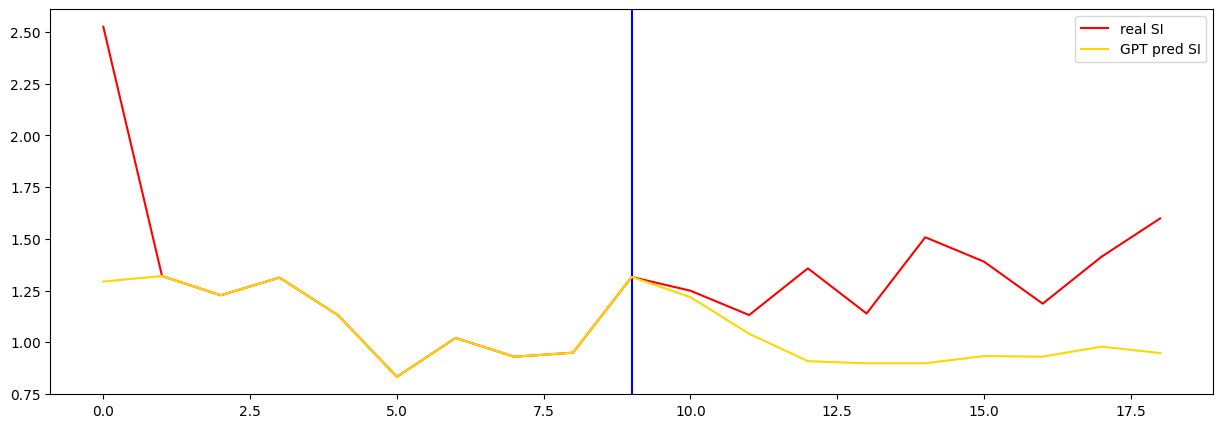

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )



## Run 4


In [33]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.130390
Loss_SI: 1.1198583841323853 Loss_all: 1.2251746654510498
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.111008
Loss_SI: 0.04390594735741615 Loss_all: 0.7149276733398438
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.055178
Loss_SI: 0.017831839621067047 Loss_all: 0.3912905156612396
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.052013
Loss_SI: 0.015710825100541115 Loss_all: 0.37873589992523193
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.036900
Loss_SI: 0.007904593832790852 Loss_all: 0.2978546619415283
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.027495
Loss_SI: 0.009079236537218094 Loss_all: 0.19323937594890594
Prediction shape: torch.Size([32, 35])
===


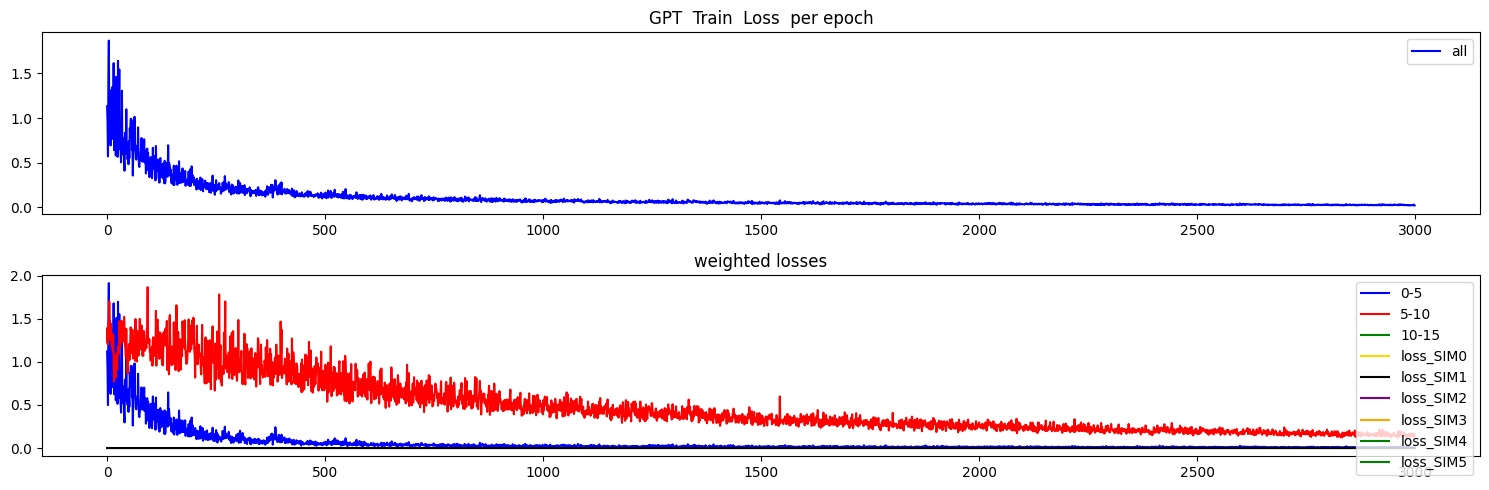

(19,)
(19,)
mae, mse, rmse, mape, mspe, rse, corr
(0.1504077, 0.037118234, 0.19266093, 0.16744667, 0.047975674, 1.3024867)
Testing R**2 - SI only:  -0.6964715192211659
Testing R**2 - All features (yes inputs):  0.9673256860079913
Testing R**2 - (all) - (no inputs):  0.9604606437045493
Testing R**2 - (f2) - SI full (yes inputs):  -0.6964715192211659
Testing R**2 - (f2) - SI full (no inputs):  -0.6238455866081711
Test MSE Loss - SI only:  0.03711823746562004
Testing R**2 - SI only:  -0.6964715192211659


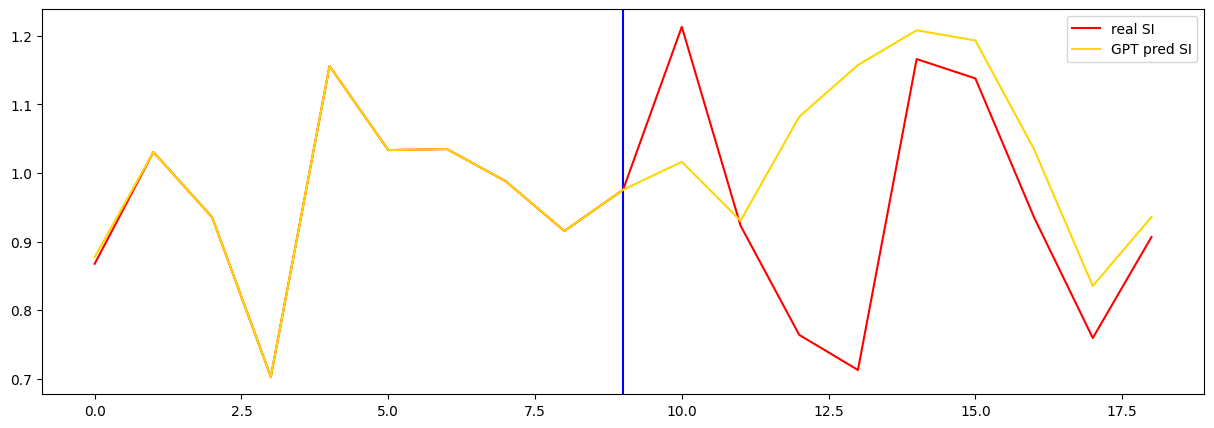

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )


[0] Train Loss: 0.894893
Loss_SI: 0.871557354927063 Loss_all: 1.1049138307571411
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.292540
Loss_SI: 0.2450743019580841 Loss_all: 0.7197332382202148
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.146208
Loss_SI: 0.07371620833873749 Loss_all: 0.7986357808113098
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.136136
Loss_SI: 0.06139212101697922 Loss_all: 0.8088319897651672
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.072953
Loss_SI: 0.030589913949370384 Loss_all: 0.45422184467315674
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.061507
Loss_SI: 0.023543985560536385 Loss_all: 0.403174489736557
Prediction shape: torch.Size([32, 35])
===


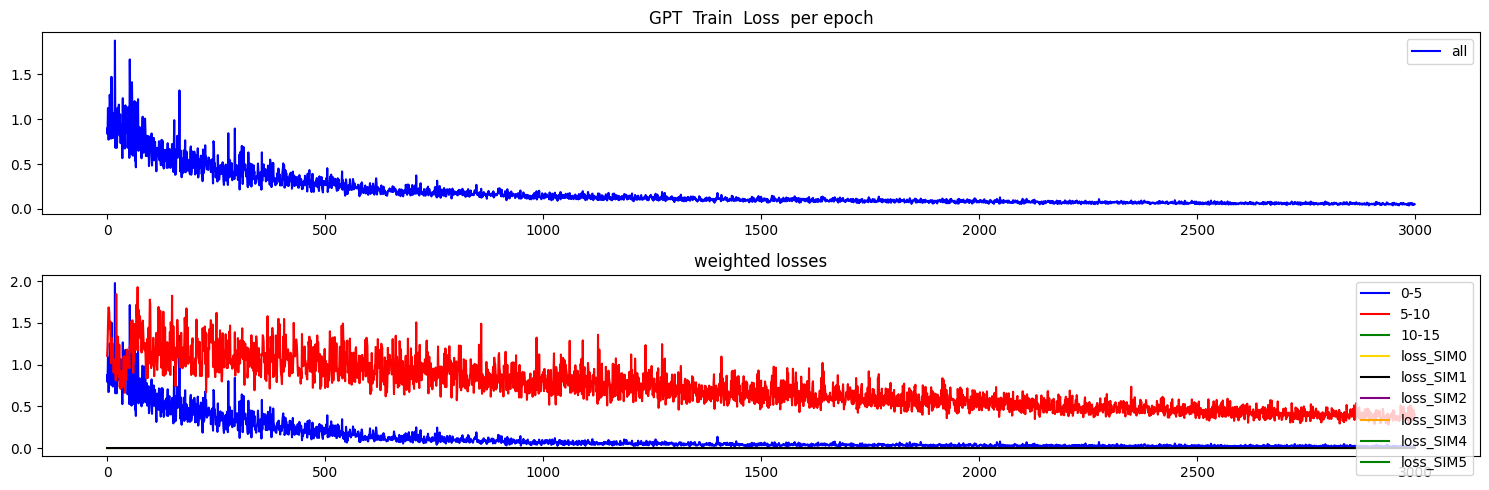

(19,)
(19,)
mae, mse, rmse, mape, mspe, rse, corr
(0.13443118, 0.03111031, 0.17638116, 0.14420497, 0.036636084, 1.192427)
Testing R**2 - SI only:  -0.42188208870511046
Testing R**2 - All features (yes inputs):  0.9826597523581218
Testing R**2 - (all) - (no inputs):  0.9928429035455881
Testing R**2 - (f2) - SI full (yes inputs):  -0.42188208870511046
Testing R**2 - (f2) - SI full (no inputs):  -0.06242411864045905
Test MSE Loss - SI only:  0.031110305339097977
Testing R**2 - SI only:  -0.42188208870511046


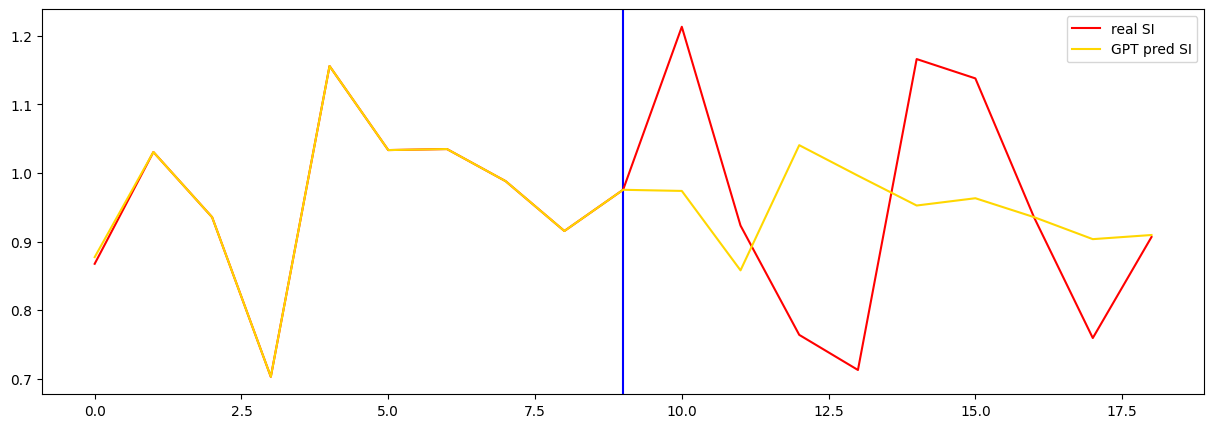

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


[0] Train Loss: 0.905899
Loss_SI: 0.8393952250480652 Loss_all: 1.5044333934783936
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.443915
Loss_SI: 0.3795621395111084 Loss_all: 1.0230923891067505
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.261672
Loss_SI: 0.19598205387592316 Loss_all: 0.852877140045166
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.139139
Loss_SI: 0.06540301442146301 Loss_all: 0.8027582168579102
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.128999
Loss_SI: 0.0708034485578537 Loss_all: 0.6527630090713501
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.115743
Loss_SI: 0.034361936151981354 Loss_all: 0.848168671131134
Prediction shape: torch.Size([32, 35])
===


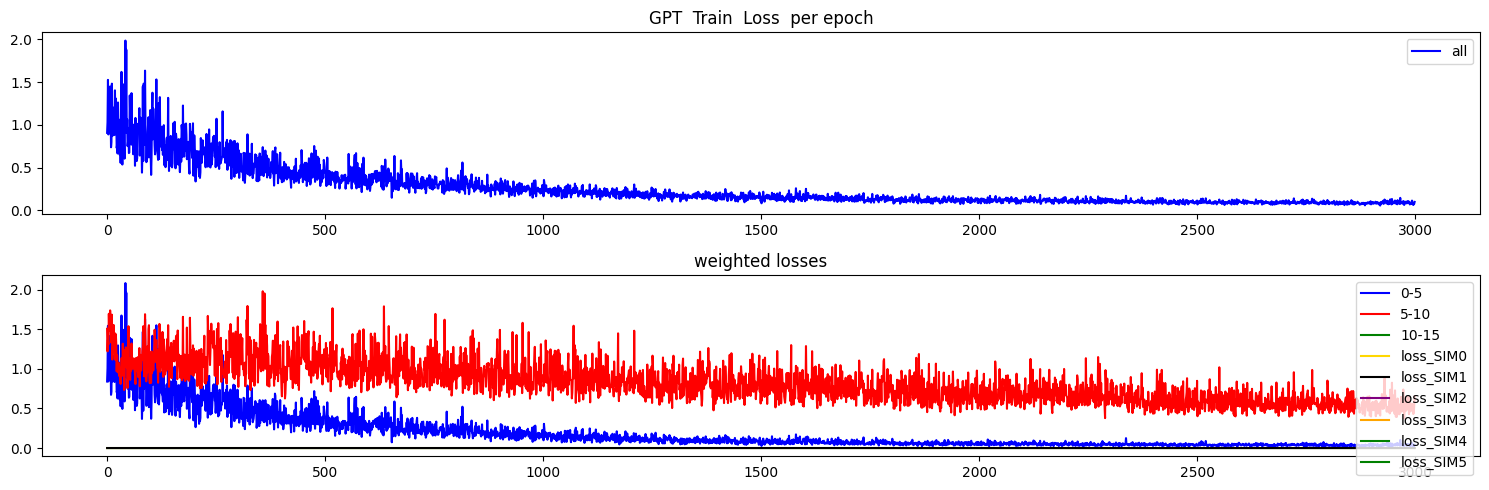

(19,)
(19,)
mae, mse, rmse, mape, mspe, rse, corr
(0.13385141, 0.031006332, 0.17608616, 0.14519243, 0.037746377, 1.1904327)
Testing R**2 - SI only:  -0.41713006851281587
Testing R**2 - All features (yes inputs):  0.9577194178724809
Testing R**2 - (all) - (no inputs):  0.9401742654038489
Testing R**2 - (f2) - SI full (yes inputs):  -0.41713006851281587
Testing R**2 - (f2) - SI full (no inputs):  -0.05270820879223104
Test MSE Loss - SI only:  0.031006336212158203
Testing R**2 - SI only:  -0.41713006851281587


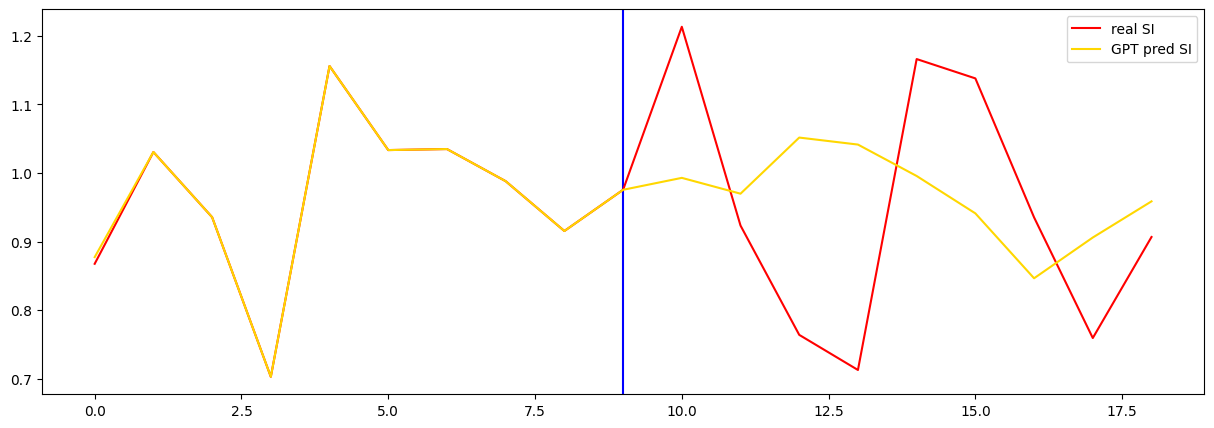

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


[0] Train Loss: 1.555080
Loss_SI: 1.5987739562988281 Loss_all: 1.1618341207504272
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.479141
Loss_SI: 0.409420371055603 Loss_all: 1.1066268682479858
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.556244
Loss_SI: 0.5332333445549011 Loss_all: 0.7633377313613892
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.350891
Loss_SI: 0.29358571767807007 Loss_all: 0.866637110710144
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.194268
Loss_SI: 0.12636631727218628 Loss_all: 0.8053836226463318
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.141840
Loss_SI: 0.07902999222278595 Loss_all: 0.7071266174316406
Prediction shape: torch.Size([32, 35])
===


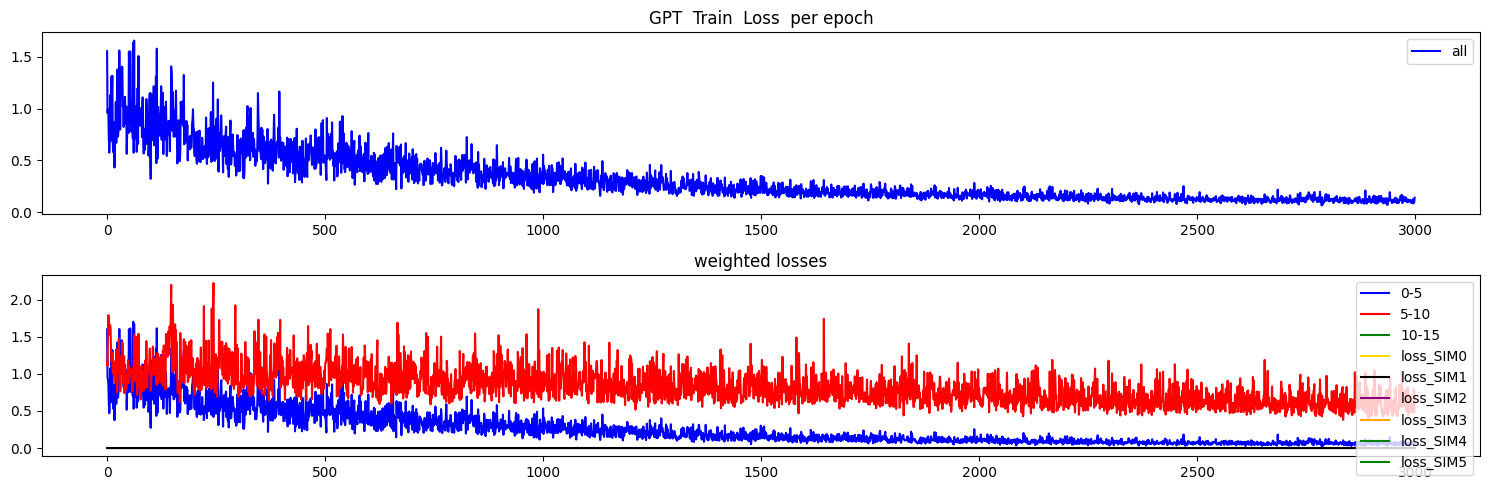

(19,)
(19,)
mae, mse, rmse, mape, mspe, rse, corr
(0.14345582, 0.034026626, 0.18446307, 0.14712584, 0.033067178, 1.247065)
Testing R**2 - SI only:  -0.555171061862165
Testing R**2 - All features (yes inputs):  0.9712750956833794
Testing R**2 - (all) - (no inputs):  0.9688009500138437
Testing R**2 - (f2) - SI full (yes inputs):  -0.555171061862165
Testing R**2 - (f2) - SI full (no inputs):  -0.3349447718684684
Test MSE Loss - SI only:  0.034026626497507095
Testing R**2 - SI only:  -0.555171061862165


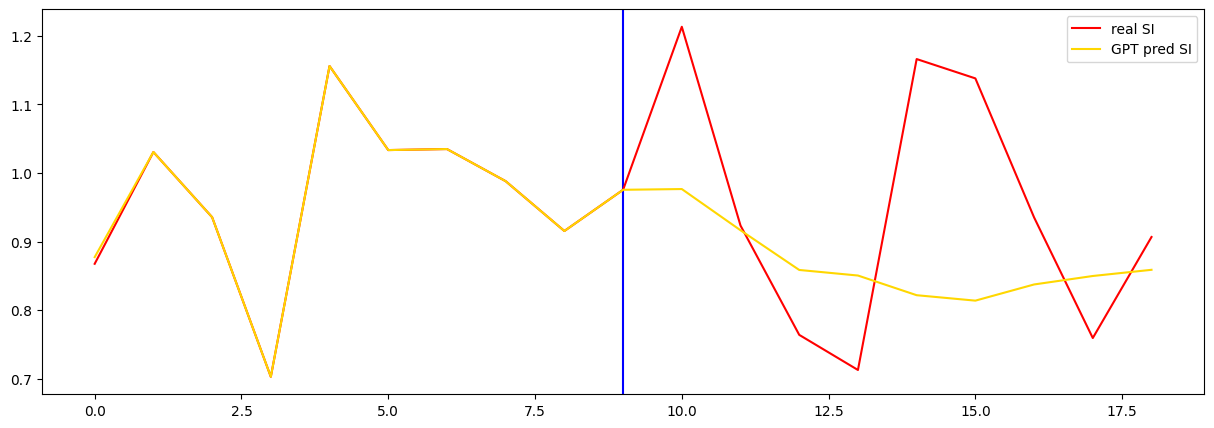

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )



## Run 5


In [38]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.783453
Loss_SI: 0.7549235224723816 Loss_all: 1.0402145385742188
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.199819
Loss_SI: 0.11279681324958801 Loss_all: 0.9830189347267151
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.086670
Loss_SI: 0.02198982611298561 Loss_all: 0.6687894463539124
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.050144
Loss_SI: 0.00981936976313591 Loss_all: 0.4130658507347107
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.039658
Loss_SI: 0.014548594132065773 Loss_all: 0.26563966274261475
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.027725
Loss_SI: 0.008017267100512981 Loss_all: 0.20509926974773407
Prediction shape: torch.Size([32, 35])
===


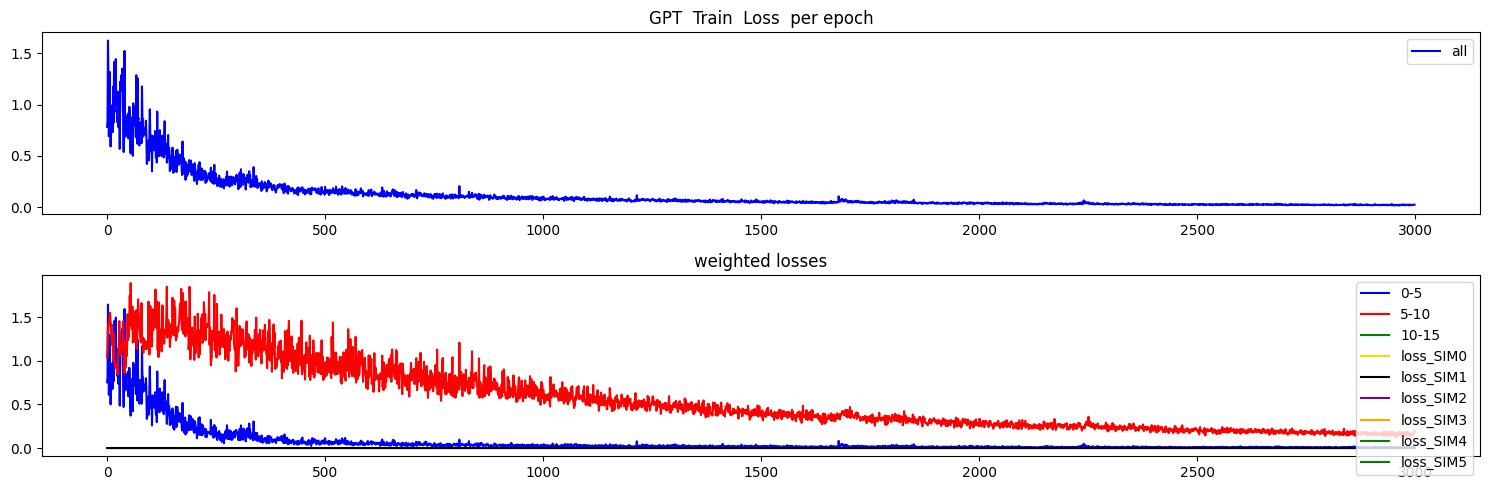

(19,)
(19,)
mae, mse, rmse, mape, mspe, rse, corr
(0.14604898, 0.031825617, 0.17839736, 0.15853453, 0.03689133, 1.2675536)
Testing R**2 - SI only:  -0.6066920652509258
Testing R**2 - All features (yes inputs):  0.9974586967881155
Testing R**2 - (all) - (no inputs):  0.9985736545993746
Testing R**2 - (f2) - SI full (yes inputs):  -0.6066920652509258
Testing R**2 - (f2) - SI full (no inputs):  -0.16108712908221134
Test MSE Loss - SI only:  0.03182561695575714
Testing R**2 - SI only:  -0.6066920652509258


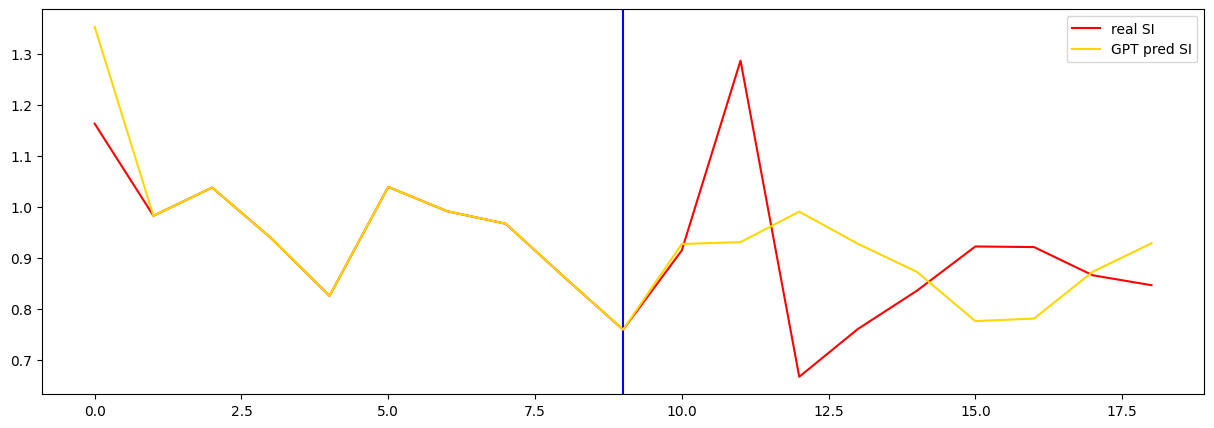

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )


[0] Train Loss: 0.770745
Loss_SI: 0.7220599055290222 Loss_all: 1.208907127380371
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.245790
Loss_SI: 0.18301330506801605 Loss_all: 0.8107783794403076
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.163233
Loss_SI: 0.06683530658483505 Loss_all: 1.030814290046692
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.118140
Loss_SI: 0.06609638780355453 Loss_all: 0.5865277647972107
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.072933
Loss_SI: 0.01750619150698185 Loss_all: 0.5717748403549194
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.056575
Loss_SI: 0.026284221559762955 Loss_all: 0.32919418811798096
Prediction shape: torch.Size([32, 35])
===


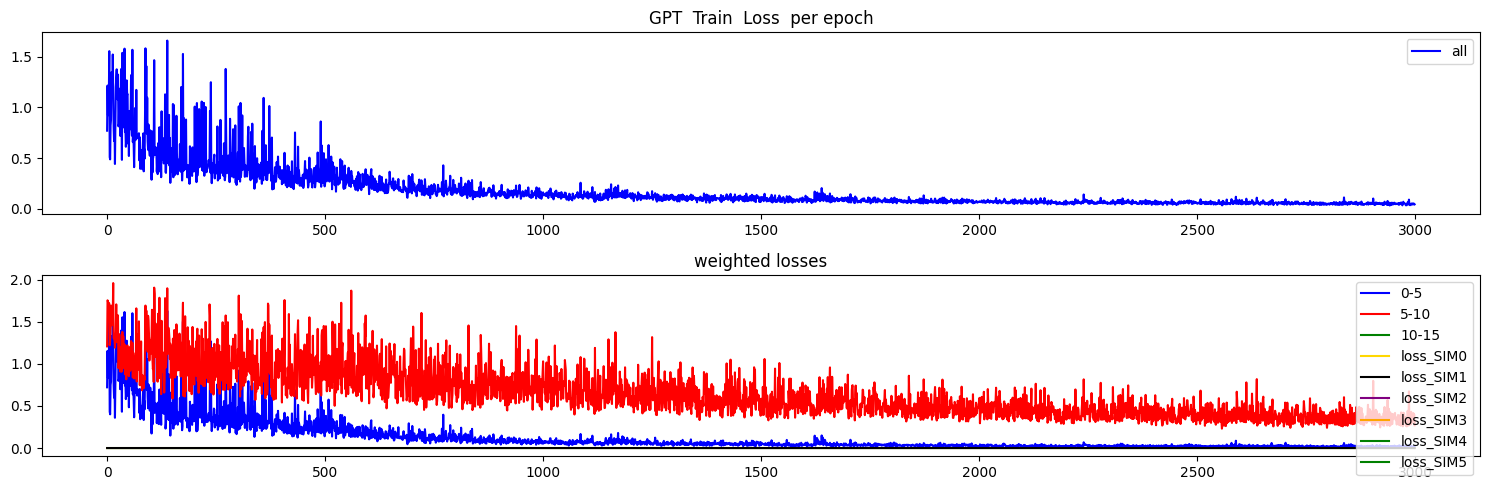

(19,)
(19,)
mae, mse, rmse, mape, mspe, rse, corr
(0.16284971, 0.037403725, 0.19340043, 0.18722267, 0.05416404, 1.3741537)
Testing R**2 - SI only:  -0.8882983383549816
Testing R**2 - All features (yes inputs):  0.9968110238528255
Testing R**2 - (all) - (no inputs):  0.9972317595546619
Testing R**2 - (f2) - SI full (yes inputs):  -0.8882983383549816
Testing R**2 - (f2) - SI full (no inputs):  -0.5155906186500161
Test MSE Loss - SI only:  0.03740372508764267
Testing R**2 - SI only:  -0.8882983383549816


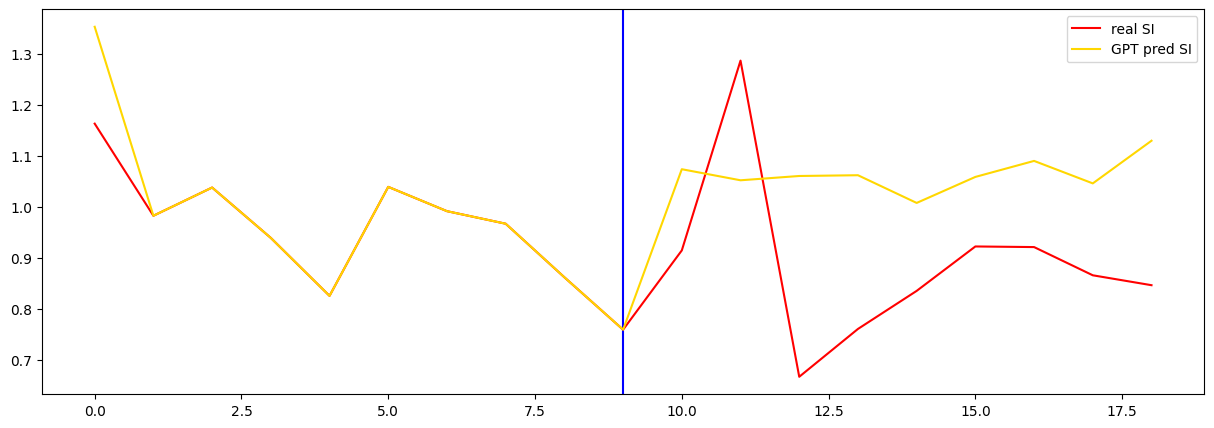

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


[0] Train Loss: 0.762538
Loss_SI: 0.7189078330993652 Loss_all: 1.1552045345306396
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.343071
Loss_SI: 0.29236292839050293 Loss_all: 0.7994410395622253
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.207967
Loss_SI: 0.14896073937416077 Loss_all: 0.7390280365943909
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.160141
Loss_SI: 0.09755277633666992 Loss_all: 0.7234373688697815
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.135887
Loss_SI: 0.07684770226478577 Loss_all: 0.6672376394271851
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.081750
Loss_SI: 0.03957407921552658 Loss_all: 0.46133357286453247
Prediction shape: torch.Size([32, 35])
===


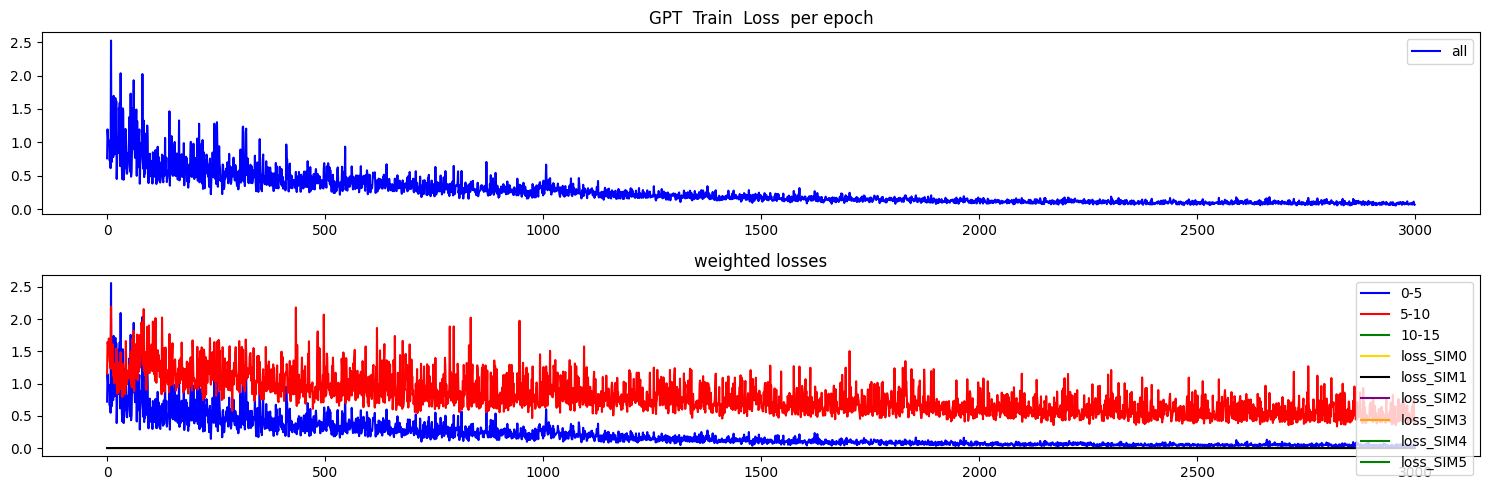

(19,)
(19,)
mae, mse, rmse, mape, mspe, rse, corr
(0.14786063, 0.030555211, 0.17480049, 0.16761914, 0.04034685, 1.241997)
Testing R**2 - SI only:  -0.5425563635157971
Testing R**2 - All features (yes inputs):  0.995606215270054
Testing R**2 - (all) - (no inputs):  0.9947355510843716
Testing R**2 - (f2) - SI full (yes inputs):  -0.5425563635157971
Testing R**2 - (f2) - SI full (no inputs):  -0.08034911916372578
Test MSE Loss - SI only:  0.030555211007595062
Testing R**2 - SI only:  -0.5425563635157971


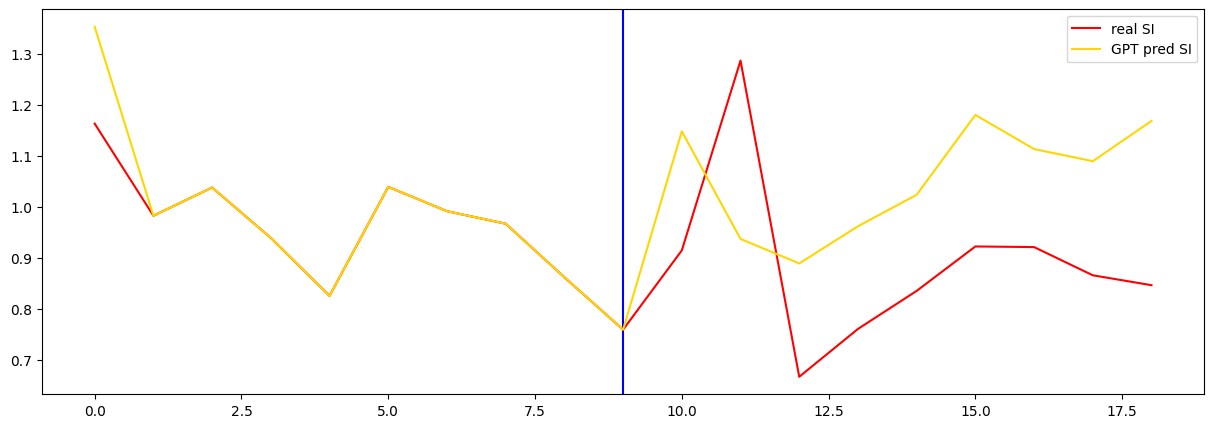

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )


[0] Train Loss: 1.171865
Loss_SI: 1.1869525909423828 Loss_all: 1.0360804796218872
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.315463
Loss_SI: 0.23258984088897705 Loss_all: 1.0613195896148682
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.230192
Loss_SI: 0.17698943614959717 Loss_all: 0.7090179324150085
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.323547
Loss_SI: 0.23722070455551147 Loss_all: 1.1004869937896729
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.182738
Loss_SI: 0.14867496490478516 Loss_all: 0.48930108547210693
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.132646
Loss_SI: 0.09814038127660751 Loss_all: 0.44319403171539307
Prediction shape: torch.Size([32, 35])
===


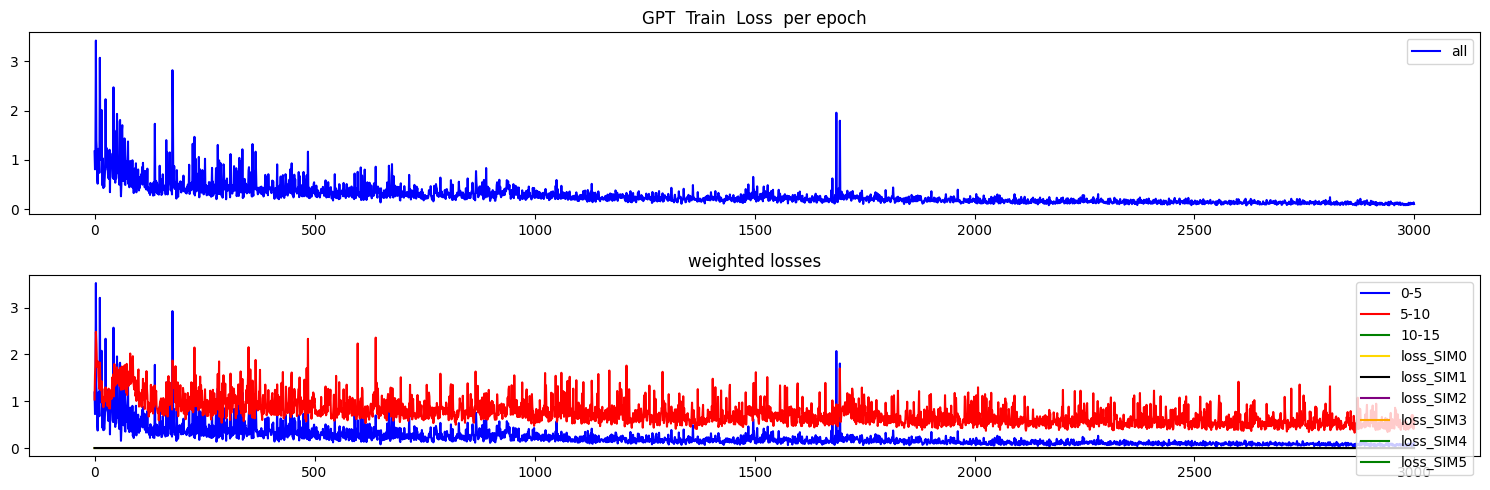

(19,)
(19,)
mae, mse, rmse, mape, mspe, rse, corr
(0.14598091, 0.030473439, 0.17456643, 0.15958679, 0.035294782, 1.2403339)
Testing R**2 - SI only:  -0.5384282193215824
Testing R**2 - All features (yes inputs):  0.9956108539471658
Testing R**2 - (all) - (no inputs):  0.9947451618269103
Testing R**2 - (f2) - SI full (yes inputs):  -0.5384282193215824
Testing R**2 - (f2) - SI full (no inputs):  -0.07515235452436908
Test MSE Loss - SI only:  0.030473439022898674
Testing R**2 - SI only:  -0.5384282193215824


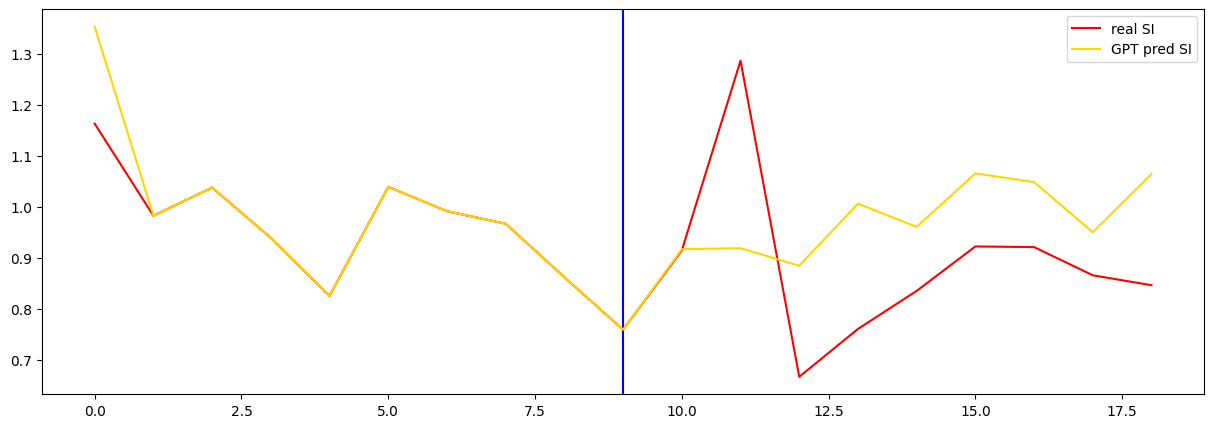

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )
